In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

from astropy.io import fits

-----------------------------------

### Check with 8yrs Data

------------------------------------

In [2]:
gll_psc_v22 = fits.open('gll_psc_v22.fit')
gll_psc_v22.info()

Filename: gll_psc_v22.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   ()      
  1  LAT_Point_Source_Catalog    1 BinTableHDU    482   5065R x 84C   [18A, E, E, E, E, E, E, E, E, E, E, I, 18A, E, E, E, E, E, E, 17A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 7E, 14E, 7E, 7E, E, E, E, E, E, E, D, E, 8E, 16E, 8E, E, E, E, E, E, E, D, E, 48E, 96E, 48E, 18A, 18A, 18A, 18A, 18A, A, 26A, 5A, 5A, 28A, 26A, E, E, D, D, E, I]   
  2  ExtendedSources    1 BinTableHDU     74   75R x 11C   [17A, E, E, E, E, 11A, E, E, E, 11A, 24A]   
  3  ROIs          1 BinTableHDU    119   1748R x 12C   [I, E, E, E, E, E, E, E, E, E, E, E]   
  4  Components    1 BinTableHDU     53   15R x 9C   [E, E, I, I, E, E, E, I, I]   
  5  EnergyBounds    1 BinTableHDU     75   19R x 10C   [E, E, E, I, I, E, E, E, I, I]   
  6  Hist_Start    1 BinTableHDU     42   9R x 1C   [D]   
  7  Hist2_Start    1 BinTableHDU     42   49R x 1C   [D]   
  

In [3]:
gll_psc_v22_list1 = gll_psc_v22[1]
print ('data shape: ', gll_psc_v22_list1.data.shape)

data shape:  (5065,)


In [4]:
# print ('columns descriptions: ', '\n', gll_psc_v22_list1.columns)

In [5]:
# print ('only column names list:', '\n' , gll_psc_v22_list1.columns.names)

In [4]:
gll_psc_v22_list1_data = gll_psc_v22_list1.data

# check the column names before 
v22LP_Name = gll_psc_v22_list1_data['Source_Name']
v22LP_RA = gll_psc_v22_list1_data['RAJ2000']
v22LP_DEJ = gll_psc_v22_list1_data['DEJ2000']
v22LP_GLON = gll_psc_v22_list1_data['GLON']
v22LP_GLAT = gll_psc_v22_list1_data['GLAT']
v22LP_PEn = gll_psc_v22_list1_data['Pivot_Energy']
v22LP_F1000 = gll_psc_v22_list1_data['Flux1000']
v22LP_EnF1000 = gll_psc_v22_list1_data['Energy_Flux100']
v22LP_spectype = gll_psc_v22_list1_data['SpectrumType']
v22LP_FDensity = gll_psc_v22_list1_data['LP_Flux_Density']
v22LP_Index = gll_psc_v22_list1_data['LP_Index']
v22LP_Beta = gll_psc_v22_list1_data['LP_beta']
v22LP_Scurve = gll_psc_v22_list1_data['LP_SigCurv']
v22LP_Npred = gll_psc_v22_list1_data['Npred']
v22LP_Class1 = gll_psc_v22_list1_data['CLASS1']

In [6]:
v22LP_df = pd.DataFrame(data=v22LP_Name, columns=['N'])
v22LP_df.head(3)

,N
0,4FGL J0000.3-7355
1,4FGL J0001.2+4741
2,4FGL J0001.2-0747


In [7]:
list_of_cols_v22 = [v22LP_GLAT, v22LP_GLON, v22LP_RA, v22LP_RA, v22LP_PEn, v22LP_F1000, v22LP_EnF1000, 
                    v22LP_spectype, v22LP_FDensity, v22LP_Index, v22LP_Beta, v22LP_Scurve, 
                    v22LP_Npred, v22LP_Class1]
list_of_cols_strings_v22 = ['GLAT', 'GLON', 'RA', 'DEC', 'Piv_En', 'Flux1000', 'En_flux_100', 
                            'Spec_Type', 'LP_f_density', 'LP_index', 'LP_beta', 'LP_Sigma', 'Npred', 'Class1']

for y in range(len(list_of_cols_v22)):
    v22LP_df[list_of_cols_strings_v22[y]] = list_of_cols_v22[y]

In [7]:
v22LP_df.head(3)

,N,GLAT,GLON,RA,DEC,Piv_En,Flux1000,En_flux_100,Spec_Type,LP_f_density,LP_index,LP_beta,LP_Sigma,Npred,Class1
0,4FGL J0000.3-7355,-42.729538,307.708984,0.0983,0.0983,2430.182617,1.719459e-10,1.920053e-12,PowerLaw,3.261875e-14,1.993995,0.089688,0.618439,230.866776,
1,4FGL J0001.2+4741,-14.338059,114.250198,0.3126,0.3126,2365.882568,1.425261e-10,1.630798e-12,PowerLaw,2.697570e-14,2.173274,0.024624,0.204077,204.544220,bcu
2,4FGL J0001.2-0747,-67.305008,89.032722,0.3151,0.3151,1272.357910,8.397412e-10,9.440178e-12,PowerLaw,6.168165e-13,2.112588,0.047278,1.417618,964.353760,bll


In [8]:
v22LP_df['En_flux_100'].min()
print ('max and min val of RA: ', v22LP_df['RA'].max(), v22LP_df['RA'].min())

max and min val of RA:  359.9816 0.0983


In [23]:
# v22LP_df.Class1.value_counts() # distribution of different classes

-----------------------------------------
##### select a DataFrame with diffrent types of AGNs (see Class1 Tag)
-----------------------------------------

In [9]:
# create a sub-dataframe from the main where only classified AGNs are present 
# see the 10 year fits data notebook for more detail. 

# first check the unique elements of column Class1
Class1_unique = v22LP_df.Class1.unique()
print ('check unique elements in Class1: ', Class1_unique)

Class1_AGNs = ['fsrq ', 'FSRQ ', 'bll  ', 'BLL  ', 'bcu  ', 'BCU  ', 'rdg  ', 'RDG  ', 'nlsy1', 'NLSY1', 
               'agn  ', 'AGN  ', 'sey  ', 'ssrq '] # beware of capital and small letters 
# based on  these categories, create a dataframe which is unique for only AGNs

v22LP_df_AGNs = v22LP_df[v22LP_df['Class1'].isin(Class1_AGNs)]

check unique elements in Class1:  ['     ' 'bcu  ' 'bll  ' 'fsrq ' 'unk  ' 'PSR  ' 'rdg  ' 'agn  ' 'FSRQ '
 'glc  ' 'snr  ' 'gal  ' 'sbg  ' 'BLL  ' 'GAL  ' 'spp  ' 'SNR  ' 'HMB  '
 'RDG  ' 'nlsy1' 'css  ' 'AGN  ' 'PWN  ' 'pwn  ' 'BCU  ' 'hmb  ' 'ssrq '
 'NLSY1' 'lmb  ' 'SFR  ' 'LMB  ' 'BIN  ' 'psr  ' 'sey  ' 'NOV  ']


In [10]:
print ('Data frame shape: ', v22LP_df.shape)
print ('Only AGN Dataframe shape: ', v22LP_df_AGNs.shape)
print ('cross check the unique elements in Class column and length: ', v22LP_df_AGNs.Class1.unique(), 
      len(v22LP_df_AGNs.Class1.unique()))

Data frame shape:  (5065, 15)
Only AGN Dataframe shape:  (3202, 15)
cross check the unique elements in Class column and length:  ['bcu  ' 'bll  ' 'fsrq ' 'rdg  ' 'agn  ' 'FSRQ ' 'BLL  ' 'RDG  ' 'nlsy1'
 'AGN  ' 'BCU  ' 'ssrq ' 'NLSY1' 'sey  '] 14


In [11]:
v22LP_df_AGNs.head(4)

,N,GLAT,GLON,RA,DEC,Piv_En,Flux1000,En_flux_100,Spec_Type,LP_f_density,LP_index,LP_beta,LP_Sigma,Npred,Class1
1,4FGL J0001.2+4741,-14.338059,114.250198,0.3126,0.3126,2365.882568,1.425261e-10,1.630798e-12,PowerLaw,2.697570e-14,2.173274,0.024624,0.204077,204.544220,bcu
2,4FGL J0001.2-0747,-67.305008,89.032722,0.3151,0.3151,1272.357910,8.397412e-10,9.440178e-12,PowerLaw,6.168165e-13,2.112588,0.047278,1.417618,964.353760,bll
3,4FGL J0001.5+2113,-40.167652,107.649353,0.3815,0.3815,376.395752,9.679271e-10,1.926035e-11,LogParabola,2.854482e-11,2.597551,0.148002,5.091226,3110.884766,fsrq
4,4FGL J0001.6-4156,-72.028549,334.226349,0.4165,0.4165,3475.903076,2.808932e-10,3.386480e-12,PowerLaw,2.547874e-14,1.795589,0.025063,0.403036,241.042725,bcu


In [12]:
print (v22LP_df_AGNs[16:19])

                     N       GLAT        GLON      RA     DEC       Piv_En  \
26  4FGL J0008.0+4711  -15.033559  115.316254  2.0024  2.0024  1403.923462   
27  4FGL J0008.0-3937  -74.583328  335.996185  2.0048  2.0048   830.423584   
29  4FGL J0008.4-2339  -79.690834   50.265141  2.1110  2.1110  6084.114746   

        Flux1000   En_flux_100          Spec_Type  LP_f_density  LP_index  \
26  2.053179e-09  1.826604e-11  LogParabola        1.098710e-12  1.934635   
27  1.608325e-10  1.372168e-12  LogParabola        5.717741e-13  2.402297   
29  1.954510e-10  2.692501e-12  PowerLaw           8.525738e-15  1.480988   

     LP_beta  LP_Sigma        Npred Class1  
26  0.079399  3.558208  1864.453979  bll    
27  0.724504  3.065208   241.720627  bcu    
29  0.162817  1.840217   128.712952  bll    


In [11]:
v22LP_df_AGNs_highlat = v22LP_df_AGNs.loc[(v22LP_df_AGNs['GLAT']> 10.) & (v22LP_df_AGNs['GLAT']> -10.)]
print(v22LP_df_AGNs_highlat['En_flux_100'].min())

# Flux threshold of 4FGL Data: ~ 2e-12 erg cm^{-2} s^{-1}: Page 27, 4FGL data
print ('max value of AGN E100: ', v22LP_df_AGNs['En_flux_100'].max())
print ('min value of AGN E100: ', v22LP_df_AGNs['En_flux_100'].min())

print ('max value of AGN piv en: ', v22LP_df_AGNs['Piv_En'].max())
print ('min value of AGN piv en: ', v22LP_df_AGNs['Piv_En'].min())

print ('max value of AGN alpha: ', v22LP_df_AGNs['LP_index'].max())
print ('min value of AGN alpha: ', v22LP_df_AGNs['LP_index'].min())

print ('max value of AGN beta: ', v22LP_df_AGNs['LP_beta'].max())
print ('min value of AGN beta: ', v22LP_df_AGNs['LP_beta'].min())

print ('max value of AGN flux density: ', v22LP_df_AGNs['LP_f_density'].max())
print ('min value of AGN flux density: ', v22LP_df_AGNs['LP_f_density'].min())

6.493107e-13
max value of AGN E100:  1.1148474e-09
min value of AGN E100:  6.493107e-13
max value of AGN piv en:  25099.262
min value of AGN piv en:  137.84961
max value of AGN alpha:  3.5768776
min value of AGN alpha:  -0.33025742
max value of AGN beta:  0.999999
min value of AGN beta:  -0.16824844
max value of AGN flux density:  7.2006756e-10
min value of AGN flux density:  2.257817e-16


In [15]:
print ('check the Class counts: ','\n' ,v22LP_df_AGNs['Class1'].value_counts())
# as can be see mostly Blazar candidate of uncertain types (bcu) are present objects are present within AGN

check the Class counts:  
 bcu      1310
bll      1109
fsrq      651
FSRQ       43
rdg        36
BLL        22
agn        10
RDG         6
nlsy1       5
NLSY1       4
ssrq        2
BCU         2
AGN         1
sey         1
Name: Class1, dtype: int64


----------------------------
##### select a DataFrame with diffrent types of PSRs (see Class1 Tag)
----------------------------

In [12]:
v22LP_Name = gll_psc_v22_list1_data['Source_Name']
v22LP_RA = gll_psc_v22_list1_data['RAJ2000']
v22LP_DEJ = gll_psc_v22_list1_data['DEJ2000']
v22LP_GLON = gll_psc_v22_list1_data['GLON']
v22LP_GLAT = gll_psc_v22_list1_data['GLAT']
v22LP_PEn = gll_psc_v22_list1_data['Pivot_Energy']
v22LP_F1000 = gll_psc_v22_list1_data['Flux1000']
v22LP_EnF1000 = gll_psc_v22_list1_data['Energy_Flux100']
v22LP_spectype = gll_psc_v22_list1_data['SpectrumType']
v22PLEC_Index = gll_psc_v22_list1_data['PLEC_Index']
v22PLEC_ExpIndex = gll_psc_v22_list1_data['PLEC_Exp_Index'] 
v22PLEC_FDensity = gll_psc_v22_list1_data['PLEC_Flux_Density']
v22PLEC_ExpFactor = gll_psc_v22_list1_data['PLEC_Expfactor']
v22PLEC_SigCurv = gll_psc_v22_list1_data['PLEC_SigCurv']
v22LP_Npred = gll_psc_v22_list1_data['Npred']
v22LP_Class1 = gll_psc_v22_list1_data['CLASS1'] 

In [13]:
v22PLEC_df =pd.DataFrame(data = v22LP_Name, columns=['N'])

In [14]:
list_of_cols_v22_plec = [v22LP_GLAT, v22LP_GLON, v22LP_RA, v22LP_DEJ, v22LP_PEn, v22LP_F1000, v22LP_EnF1000, 
                         v22LP_spectype, v22PLEC_FDensity, v22PLEC_Index, v22PLEC_ExpIndex, v22PLEC_ExpFactor, 
                         v22PLEC_SigCurv, v22LP_Npred, v22LP_Class1]
list_of_cols_strings_v22_plec = ['GLAT', 'GLON', 'RA', 'DEC', 'Piv_En', 'Flux1000', 'En_flux_100', 
                                 'Spec_Type', 'PLEC_f_density', 'PLEC_Index', 'PLEC_ExpIndex', 
                                 'PLEC_ExpFac', 'PLEC_Sigma', 'Npred', 'Class1']

for pl in range(len(list_of_cols_v22_plec)):
    v22PLEC_df[list_of_cols_strings_v22_plec[pl]] = list_of_cols_v22_plec[pl]

In [21]:
# v22PLEC_df.head(3)
v22PLEC_df.shape

(5065, 16)

In [15]:
Class1_PSRs = ['PSR  ', 'psr  ']

v22PLEC_df_PSR = v22PLEC_df[v22PLEC_df['Class1'].isin(Class1_PSRs)]

In [16]:
print ('Data frame shape: ', v22PLEC_df.shape)
print ('Only AGN Dataframe shape: ', v22PLEC_df_PSR.shape)
print ('cross check the unique elements in Class column and length: ', v22PLEC_df_PSR.Class1.unique(), 
      len(v22PLEC_df_PSR.Class1.unique())) # in paper more than 250 ?

Data frame shape:  (5065, 16)
Only AGN Dataframe shape:  (239, 16)
cross check the unique elements in Class column and length:  ['PSR  ' 'psr  '] 2


In [17]:
# v22PLEC_df_PSR.head(3)
v22PLEC_df_PSR.Class1.value_counts()

PSR      232
psr        7
Name: Class1, dtype: int64

In [17]:
# fig = plt.figure(figsize=(8, 4))

# plt.subplot(1, 2, 1)
# plt.hist(v22PLEC_df_PSR['PLEC_Sigma'], bins=30)
# plt.xlabel(r'$\sigma$ of curvature: PLEC', fontsize=12)

# plt.subplot(1, 2, 2)
# plt.hist(v22LP_df_AGNs['LP_Sigma'], bins=30)
# plt.xlabel(r'$\sigma$ of curvature: LP', fontsize=12)
# plt.tight_layout()

print (r"check number of sources with LP $\sigma > 3$: ", len(v22LP_df_AGNs[v22LP_df_AGNs['LP_Sigma'] > 3.]))
print (r"check number of sources with PLEC $\sigma > 3$: ", len(v22PLEC_df_PSR[v22PLEC_df_PSR['PLEC_Sigma']> 3.]))

check number of sources with LP $\sigma > 3$:  567
check number of sources with PLEC $\sigma > 3$:  224


In [15]:
v22PLEC_df_PSR.head(5)

,N,GLAT,GLON,RA,DEC,Piv_En,Flux1000,En_flux_100,Spec_Type,PLEC_f_density,PLEC_Index,PLEC_ExpIndex,PLEC_ExpFac,PLEC_Sigma,Npred,Class1
7,4FGL J0002.8+6217,-0.051036,117.320412,0.7201,62.290501,1326.583130,2.568837e-09,1.861114e-11,PLSuperExpCutoff,2.084045e-12,1.181296,0.666667,0.013006,9.680294,2344.458740,PSR
24,4FGL J0007.0+7303,10.461680,119.662628,1.7680,73.051201,1452.299438,6.693914e-08,4.322299e-10,PLSuperExpCutoff,3.585865e-11,1.044555,0.547940,0.025027,63.447319,36404.007812,PSR
79,4FGL J0023.4+0920,-52.896538,111.420189,5.8513,9.347500,939.942505,1.219334e-09,7.603335e-12,PLSuperExpCutoff,1.829091e-12,0.910202,0.666667,0.013931,7.009738,931.353333,PSR
101,4FGL J0030.4+0451,-57.612598,113.134041,7.6107,4.859200,807.527527,1.004071e-08,6.198533e-11,PLSuperExpCutoff,1.911476e-11,0.914805,0.666667,0.013457,28.836191,6930.494629,PSR
111,4FGL J0034.3-0534,-68.073448,111.503700,8.5961,-5.580900,738.379395,2.690561e-09,2.063045e-11,PLSuperExpCutoff,6.668224e-12,1.504067,0.666667,0.008006,10.005604,2542.690186,PSR


---------------------
#### Distribution of Parameters for Selected AGNs 
------------------------

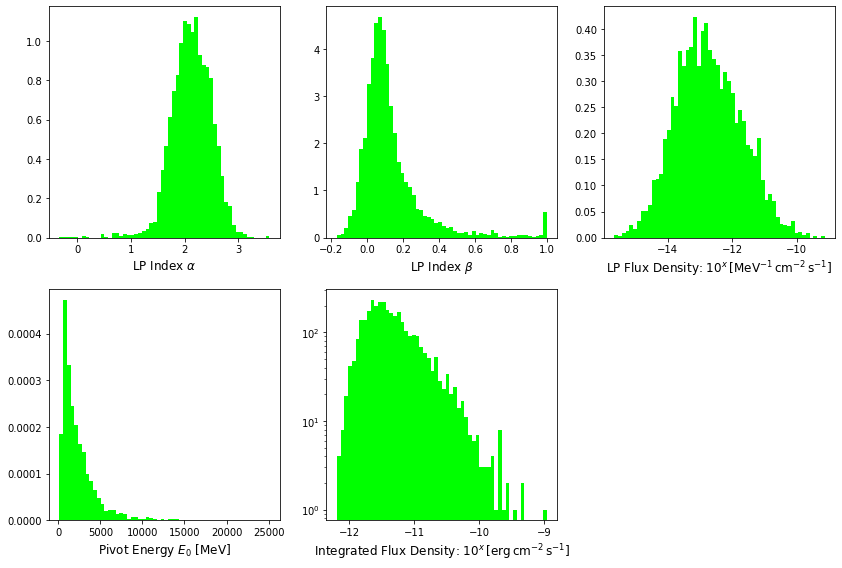

In [19]:
LP_df_AGNS_bins = int(np.sqrt(len(v22LP_df_AGNs))) # choose bin size

fig = plt.figure(figsize=(12, 8))

fig.add_subplot(231)
plt.hist(v22LP_df_AGNs['LP_index'], density=True, bins=LP_df_AGNS_bins, color='lime')
plt.xlabel(r'LP Index $\alpha$', fontsize=12)

fig.add_subplot(232)
plt.hist(v22LP_df_AGNs['LP_beta'], density=True, bins=LP_df_AGNS_bins, color='lime')
plt.xlabel(r'LP Index $\beta$', fontsize=12)

fig.add_subplot(233)
plt.hist(np.log10(v22LP_df_AGNs['LP_f_density']), bins=LP_df_AGNS_bins, density=True, color='lime')
#np.log10(v23LP_df_AGNs['LP_f_density']).plot.hist(density=True)
plt.xlabel(r'LP Flux Density: $10^{x}\, [\mathrm{MeV}^{-1}\, \mathrm{cm}^{-2}\, \mathrm{s}^{-1}] $', fontsize=12)

fig.add_subplot(234)
plt.hist(v22LP_df_AGNs['Piv_En'], bins=LP_df_AGNS_bins, density=True, color='lime')
plt.xlabel(r'Pivot Energy $E_0$ [MeV]', fontsize=12)

fig.add_subplot(235)
plt.hist(np.log10(v22LP_df_AGNs['En_flux_100']), bins=LP_df_AGNS_bins, density=False , color='lime')
plt.xlabel(r'Integrated Flux Density: $10^{x}\, [\mathrm{erg}\, \mathrm{cm}^{-2}\, \mathrm{s}^{-1}]$', 
           fontsize=12)
plt.yscale('log')

plt.tight_layout()
plt.savefig('4FGL_AGN_Params.png', dpi=170)

-----------------
#### Distribution of Parameters for Selected Pulsars 
-----------------

##### Pulsar Parametrization and Parameters Used:  

Subexponentially cutoff power-law for all significantly curved pulsars are used. Below is the parametrization--

$\frac{dN}{dE} = K\, \left(\frac{E}{E_0}\right)^{-\Gamma}\, \text{exp} \left( a\, \left(E_0^b - E^b \right) \right) $

$E_0$ : Pivot Energy is same as in LogParabola parametrization. Unit MeV. 

$K$: Power-law with Exponential cut-off (PLEC) flux density: Unit : $\text{cm}^{-2}\, \text {MeV}^{-1}\, \text{s}^{-1}$. Differential flux at Pivot Energy in PLSuperExpCutoff fit

$\Gamma : $ Low energy spectral slope. PLEC Index. 

$a: $ exponential factor in $\text{MeV} ^{-b}$. PLEC expfactor. From 4FGL paper -- no significantly negative $a$ (spectrum curved upwards) was found. 

$b: $ Exponential index: PLEC Exp Index. 

The other important parameter would be PLEC sig curve (just like LP sig curve), which signifies the likelihood of the curved representation over the likelihood of simple power law. $TS_{\text{curv}} = 2\, \text{log} \left(\frac{L_{\text{curv}} } {L_{\text{PL}}} \right)$. Curved representation is used in the global model if $TS_{\text{curv}} > 9\, (3\sigma)$ significance.    

For selection of Pulsars we will use tag $\texttt{psr}$. 

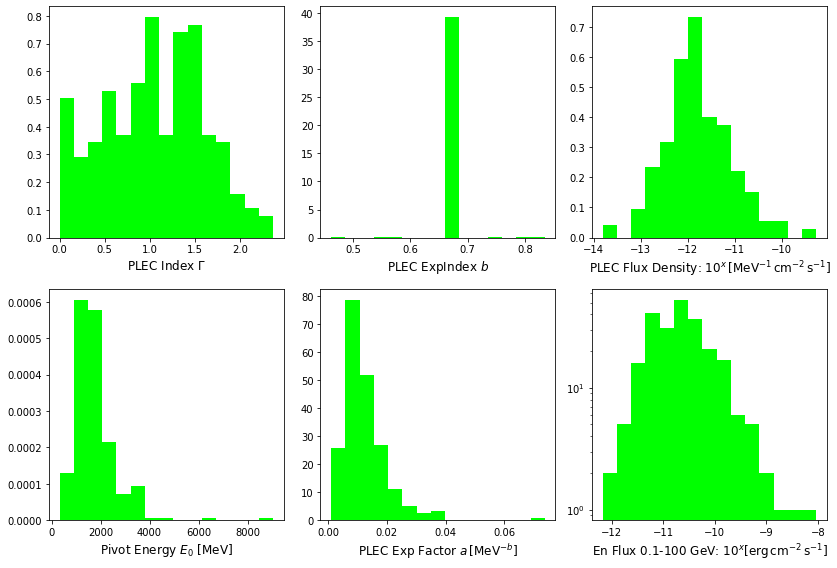

In [22]:
PLEC_df_bins = int(np.sqrt(len(v22PLEC_df_PSR)))

fig = plt.figure(figsize=(12, 8))

fig.add_subplot(231)
plt.hist(v22PLEC_df_PSR['PLEC_Index'], density=True, bins=PLEC_df_bins, color='lime')
plt.xlabel(r'PLEC Index $\Gamma$', fontsize=12)

fig.add_subplot(232)
plt.hist(v22PLEC_df_PSR['PLEC_ExpIndex'], density=True, bins=PLEC_df_bins, color='lime')
plt.xlabel(r'PLEC ExpIndex $b$', fontsize=12)

fig.add_subplot(233)
plt.hist(np.log10(v22PLEC_df_PSR['PLEC_f_density']), bins=PLEC_df_bins, density=True, color='lime')
#np.log10(v23LP_df_AGNs['LP_f_density']).plot.hist(density=True)
plt.xlabel(r'PLEC Flux Density: $10^{x}\, [\mathrm{MeV}^{-1}\, \mathrm{cm}^{-2}\, \mathrm{s}^{-1}] $', fontsize=12)

fig.add_subplot(234)
plt.hist(v22PLEC_df_PSR['Piv_En'], bins=PLEC_df_bins, density=True, color='lime')
plt.xlabel(r'Pivot Energy $E_0$ [MeV]', fontsize=12)

fig.add_subplot(235)
plt.hist(v22PLEC_df_PSR['PLEC_ExpFac'], bins=PLEC_df_bins, density=True, color='lime')
plt.xlabel(r'PLEC Exp Factor $a \, [\mathrm{MeV}^{-b}]$', fontsize=12)

fig.add_subplot(236)
plt.hist(np.log10(v22PLEC_df_PSR['En_flux_100']), bins=PLEC_df_bins, density=False, color='lime')
plt.xlabel(r'En Flux 0.1-100 GeV: $10^x [\mathrm{erg}\, \mathrm{cm}^{-2}\, \mathrm{s}^{-1}]$', 
          fontsize=12)
plt.yscale('log')

plt.tight_layout()
plt.savefig('4FGL_PSR_Params.png', dpi=170)

#### LP Parameter Generation 
##### Method 1: 

Draw the parameters $(\alpha , \beta , E_0, K)$ from Gaussian whose mean and variance are determined from the respective parameteres' distribution of all AGN tagged sources in 4FGL.  

Later: Not all of the parameters follow a gaussian distribution ! 

##### Method 2: 
A single gaussian is fitted to the selected parameter distribution and the corresponding mean and variance are used when the resulting gaussian distribution obtained from fitted parameters looks sensible.  

In [23]:
LP_index_mean = v22LP_df_AGNs['LP_index'].mean()
LP_index_var = v22LP_df_AGNs['LP_index'].var()

LP_beta_mean = v22LP_df_AGNs['LP_beta'].mean()
LP_beta_var = v22LP_df_AGNs['LP_beta'].var()

LP_Fdensity_mean = np.mean(np.log10(v22LP_df_AGNs['LP_f_density'])) # for conversion 10**(LP_Fdensity_mean)
LP_Fdensity_var = np.var(np.log10(v22LP_df_AGNs['LP_f_density']))

LP_PEn_mean = np.mean(v22LP_df_AGNs['Piv_En']) 
LP_PEn_std = np.std(v22LP_df_AGNs['Piv_En'])

print ('check LP_index_mean: ', LP_index_mean)
print ('check LP_index_var: ', LP_index_var)

print ('check LP_F_Density mean: ', LP_Fdensity_mean)
print ('check LP_F_Density var: ', LP_Fdensity_var)

print ('check LP_PEn mean: ', LP_PEn_mean)
print ('check LP_PEn std: ', LP_PEn_std)

print ('check LP_beta_mean: ', LP_beta_mean)
print ('check LP_beta_var: ', LP_beta_var)

check LP_index_mean:  2.1257427
check LP_index_var:  0.14174144
check LP_F_Density mean:  -12.731796
check LP_F_Density var:  1.0247225
check LP_PEn mean:  2401.0815
check LP_PEn std:  2342.6116
check LP_beta_mean:  0.12934594
check LP_beta_var:  0.030958492


In [24]:
# obtain mean and std from fitting a gaussian to LP alpha 
from scipy.stats import norm

LP_index_fit_mu, LP_index_fit_std = norm.fit(v22LP_df_AGNs['LP_index'])
print ('from fitting check LP_index_mean, std: ', LP_index_fit_mu, LP_index_fit_std)

LP_beta_fit_mu, LP_beta_fit_std = norm.fit(v22LP_df_AGNs['LP_beta']) # LP_beta doesn't follow normal distribution
print ('from fitting check LP_beta_mean, std: ', LP_beta_fit_mu, LP_beta_fit_std)

LP_Fdensity_fit_mu, LP_Fdensity_fit_std = norm.fit(np.log10(v22LP_df_AGNs['LP_f_density']))
print ('from fitting check LP_beta_mean, std: ', LP_Fdensity_fit_mu, LP_Fdensity_fit_std)

from fitting check LP_index_mean, std:  2.1257427 0.37642685
from fitting check LP_beta_mean, std:  0.12934594 0.17592278
from fitting check LP_beta_mean, std:  -12.731796 1.0122858


In [25]:
#### Once we obtain the mean and variance no we create the normal distribution of the same parameters..
LP_df_mockCat_bins = 15000
LPIndex_mock_dist = np.sqrt(LP_index_var) * np.random.randn(LP_df_mockCat_bins) + LP_index_mean
LPIndex_mock_dist1 = np.random.normal(LP_index_mean, np.sqrt(LP_index_var), LP_df_mockCat_bins)
LPIndex_mock_dist2 = np.random.normal(LP_index_fit_mu, LP_index_fit_std, LP_df_mockCat_bins)

LPBeta_mock_dist = np.sqrt(LP_beta_var) * np.random.randn(LP_df_mockCat_bins) + LP_beta_mean
LPBeta_mock_dist1 = np.random.normal(LP_beta_mean, np.sqrt(LP_beta_var), LP_df_mockCat_bins)
LPBeta_mock_dist2 = np.random.gumbel(LP_beta_mean-0.077, np.sqrt(LP_beta_var)-0.1, size=LP_df_mockCat_bins) 
# best for beta
LPBeta_mock_dist3 = np.random.normal(LP_beta_fit_mu, LP_beta_fit_std, LP_df_mockCat_bins)

LPFDensity_mock_dist = 10**(np.sqrt(LP_Fdensity_var) * np.random.randn(LP_df_mockCat_bins) + LP_Fdensity_mean)
LPFDensity_mock_dist1 = 10**(np.random.normal(LP_Fdensity_mean, np.sqrt(LP_Fdensity_var), LP_df_mockCat_bins))
LPFDensity_mock_dist2 = 10**(np.random.normal(LP_Fdensity_fit_mu, LP_Fdensity_fit_std, LP_df_mockCat_bins)) 

# Normal distribution for Pivot Energy doesnot work.  
 
# LPPivEN_mock_dist = LP_PEn_std * np.random.randn(3200) + LP_PEn_mean 
# LPPivEN_mock_dist1 = (np.random.normal(LP_PEn_mean, LP_PEn_std, 3200))


from scipy.stats import expon, lognorm

# LPPivEn_mock_dist2 = expon.rvs(loc=10, scale=LP_PEn_mean-100, size=3200) 
# LPPivEn_mock_dist3 = np.random.exponential(scale=LP_PEn_mean, size=3200)
# # rather than normal, here exponential distribution works best, but most samples are in 0 MeV bin 
# # which is kinda crap
# plt.hist(LPPivEn_mock_dist3, density=True, bins=50, histtype='bar')
# # plt.xscale('log')

logshape1, logloc1, logscale1 = lognorm.fit(v22LP_df_AGNs['Piv_En'], loc=0)
print ('check fit shape, loc and scale, log(scale): ', logshape1, logloc1, logscale1, np.log(logscale1))

LPPivEn_mock_dist3 = np.random.lognormal(np.log(logscale1), logshape1, LP_df_mockCat_bins)
# plt.hist(LPPivEn_mock_dist3, density=True, bins=56, color='navy')

check fit shape, loc and scale, log(scale):  0.79661051321656 -6.111387990263818 1732.875311417724 7.457537337570115


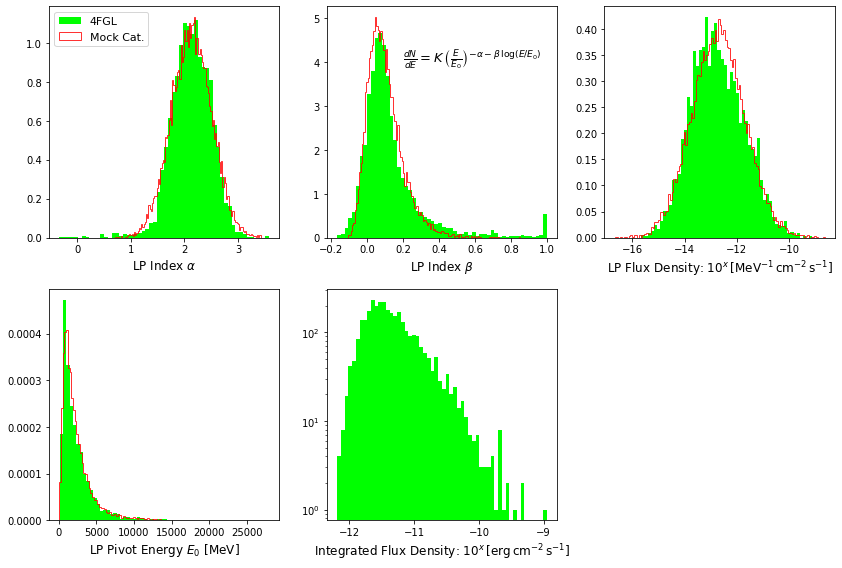

In [26]:
fig = plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.hist(v22LP_df_AGNs['LP_index'], density=True, bins=LP_df_AGNS_bins, color='lime', label='4FGL')
plt.hist(LPIndex_mock_dist2, bins=int(np.sqrt(LP_df_mockCat_bins)), density=True, histtype='stepfilled', 
         edgecolor='red', fill=False, alpha=0.8, label='Mock Cat.')
plt.xlabel(r'LP Index $\alpha$', fontsize=12)
plt.legend(fontsize=11)

plt.subplot(2, 3, 2)
plt.hist(v22LP_df_AGNs['LP_beta'], density=True, bins=LP_df_AGNS_bins, color='lime')
plt.hist(LPBeta_mock_dist2, bins=int(np.sqrt(LP_df_mockCat_bins)), density=True, 
         histtype='stepfilled', fill= False, edgecolor='red', alpha=0.8)

plt.text(0.2, 4, 
         r'$\frac{dN}{dE} = K\, \left( \frac{E}{E_0} \right )^{-\alpha -\beta \,  \mathrm{log} (E/E_0)}$', 
        fontsize=13)
plt.xlabel(r'LP Index $\beta$', fontsize=12)

plt.subplot(2, 3, 3)
plt.hist(np.log10(v22LP_df_AGNs['LP_f_density']), density=True, bins=LP_df_AGNS_bins, color='lime')
plt.hist(np.log10(LPFDensity_mock_dist1), density=True, bins=int(np.sqrt(LP_df_mockCat_bins)), edgecolor='red', 
         histtype='stepfilled', fill=False, alpha=0.8)
plt.xlabel(r'LP Flux Density: $10^{x}\, [\mathrm{MeV}^{-1}\, \mathrm{cm}^{-2}\, \mathrm{s}^{-1}]$', fontsize=12)

plt.subplot(2, 3, 4)
plt.hist(v22LP_df_AGNs['Piv_En'], density=True, bins=LP_df_AGNS_bins, color='lime')
plt.hist(LPPivEn_mock_dist3, density=True, bins=int(np.sqrt(LP_df_mockCat_bins)), edgecolor='red', 
         histtype='stepfilled', fill=False, alpha=0.8)
plt.xlabel(r'LP Pivot Energy $E_0$ [MeV]', fontsize=12)

plt.subplot(2, 3, 5)
plt.hist( np.log10(v22LP_df_AGNs['En_flux_100']), density=False, bins=LP_df_AGNS_bins, color='lime')
plt.xlabel(r'Integrated Flux Density: $10^{x}\, [\mathrm{erg}\, \mathrm{cm}^{-2}\, \mathrm{s}^{-1}]$', 
           fontsize=12)
plt.yscale('log')

plt.tight_layout()

# plt.savefig('Mock_AGN_4FGL_Params.png', dpi=180)

#### PLEC Parameter Generation 

In [27]:
PLEC_a_mean = v22PLEC_df_PSR['PLEC_ExpFac'].mean()
PLEC_a_std  = v22PLEC_df_PSR['PLEC_ExpFac'].std()

PLEC_b_mean = v22PLEC_df_PSR['PLEC_ExpIndex'].mean()
PLEC_b_std  = v22PLEC_df_PSR['PLEC_ExpIndex'].std()

PLEC_PEn_mean = v22PLEC_df_PSR['Piv_En'].mean()
PLEC_PEn_std  = v22PLEC_df_PSR['Piv_En'].std()

PLEC_index_mean = v22PLEC_df_PSR['PLEC_Index'].mean()
PLEC_index_std  = v22PLEC_df_PSR['PLEC_Index'].std()

PLEC_FDensity_mean = np.mean(np.log10(v22PLEC_df_PSR['PLEC_f_density']))
PLEC_FDensity_std = np.std(np.log10(v22PLEC_df_PSR['PLEC_f_density']))


print ('check PLEC_a_mean: ', PLEC_a_mean)
print ('check PLEC_a_std: ', PLEC_a_std)

print ('check PLEC_b_mean: ', PLEC_b_mean)
print ('check PLEC_b_std: ', PLEC_b_std)

print ('check PLEC_PEn_mean: ', PLEC_PEn_mean)
print ('check PLEC_PEn_std: ', PLEC_PEn_std)

print ('check PLEC_FDensity_mean: ', PLEC_FDensity_mean)
print ('check PLEC_FDensity_std: ', PLEC_FDensity_std)

print ('\n')

print ('check max min index : ', v22PLEC_df_PSR['PLEC_Index'].max(), v22PLEC_df_PSR['PLEC_Index'].min())
print ('check max min PLEC_a : ', v22PLEC_df_PSR['PLEC_ExpFac'].max(), v22PLEC_df_PSR['PLEC_ExpFac'].min())
print ('check max min PLEC_b : ', v22PLEC_df_PSR['PLEC_ExpIndex'].max(), v22PLEC_df_PSR['PLEC_ExpIndex'].min())
print ('check max min PLEC_FD : ', v22PLEC_df_PSR['PLEC_f_density'].max(), v22PLEC_df_PSR['PLEC_f_density'].min())
print ('check max min PLEC PEn : ', v22PLEC_df_PSR['Piv_En'].max(), v22PLEC_df_PSR['Piv_En'].min())

check PLEC_a_mean:  0.012638907
check PLEC_a_std:  0.007924317
check PLEC_b_mean:  0.6664965
check PLEC_b_std:  0.021982942
check PLEC_PEn_mean:  1772.6342
check PLEC_PEn_std:  917.1704
check PLEC_FDensity_mean:  -11.768501
check PLEC_FDensity_std:  0.71505886


check max min index :  2.3687854 0.0
check max min PLEC_a :  0.07371872 0.0010440964
check max min PLEC_b :  0.8345794 0.46149752
check max min PLEC_FD :  5.5106913e-10 1.5573046e-14
check max min PLEC PEn :  9045.71 326.64255


In [28]:
PLEC_df_mock_cat_bins = 800

PLECIndex_mock_dist1 = np.random.normal(PLEC_index_mean, PLEC_index_std, PLEC_df_mock_cat_bins)
### index minimum value is 0, so we select array elements based on condition 
# print (PLECIndex_mock_dist1.shape)
PLECIndex_mock_distf = PLECIndex_mock_dist1[np.where((PLECIndex_mock_dist1>0.) & (PLECIndex_mock_dist1<2.51))]
print (PLECIndex_mock_distf.shape)

PLECFden_mock_dist1  = 10**(np.random.normal(PLEC_FDensity_mean, PLEC_FDensity_std, PLEC_df_mock_cat_bins))

PLECb_mock_dist1     = np.random.normal(PLEC_b_mean, PLEC_b_std, PLEC_df_mock_cat_bins)


#### try as before lognorm distribution 

logshapePL_PEn, loglocPL_PEn, logscalePL_PEn = lognorm.fit(v22PLEC_df_PSR['Piv_En'], loc=0)
print ('check fit shape, loc and scale, log(scale) Pivot E: ', logshapePL_PEn, loglocPL_PEn, 
       logscalePL_PEn, np.log(logscalePL_PEn))

PLECPivEn_mock_dist3 = np.random.lognormal(np.log(logscalePL_PEn), logshapePL_PEn, PLEC_df_mock_cat_bins)
# plt.hist(LPPivEn_mock_dist3, density=True, bins=56, color='navy')

# try again lognorm for parameter a

logshapePL_Exp_a, loglocPL_Exp_a, logscalePL_Exp_a = lognorm.fit(v22PLEC_df_PSR['PLEC_ExpFac'], loc=0)
print ('check fit shape, loc and scale, log(scale) Exp a:  ', logshapePL_Exp_a, loglocPL_Exp_a, 
       logscalePL_Exp_a, np.log(logscalePL_Exp_a))

PLECExp_a_mock_dist3 = np.random.lognormal(np.log(logscalePL_Exp_a), logshapePL_Exp_a, PLEC_df_mock_cat_bins)

##### Exp b parameter is rather weird ! try gennrom distribution 
from scipy.stats import cauchy

# cauchy_PLECb_loc, cauchy_PLEC_b_scale = cauchy.fit(v22PLEC_df_PSR['PLEC_ExpIndex'], loc=0.66)
# print ('check cauchy fits: ', cauchy_PLECb_loc, cauchy_PLEC_b_scale)
# better looking result than fit 

cauchy_PLEC_b_scale1 = 0.006 # this value is result of trial and error 
cauchy_PLECb_loc = 0.666

PLECExp_b_mock_dist3 = cauchy.rvs(cauchy_PLECb_loc, cauchy_PLEC_b_scale1, size=PLEC_df_mock_cat_bins)
PLECExp_b_mock_dist3f = PLECExp_b_mock_dist3[(PLECExp_b_mock_dist3>0.4) & (PLECExp_b_mock_dist3<0.9)]
print (len(PLECExp_b_mock_dist3f))

(777,)
check fit shape, loc and scale, log(scale) Pivot E:  0.4286603424492711 -9.589461920493 1616.5709978617992 7.388062516932086
check fit shape, loc and scale, log(scale) Exp a:   0.45873166643628815 -0.0023408049501788715 0.013435632752706166 -4.30984494068795
784


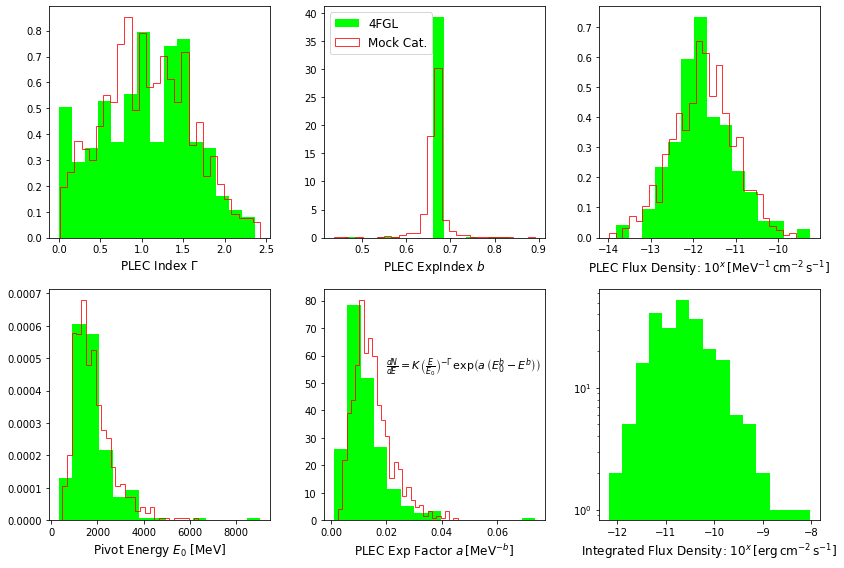

In [29]:
# plt and compare distributions 

PLEC_df_bins = int(np.sqrt(len(v22PLEC_df_PSR)))

fig = plt.figure(figsize=(12, 8))

fig.add_subplot(231)
plt.hist(v22PLEC_df_PSR['PLEC_Index'], density=True, bins=PLEC_df_bins, color='lime', label='4FGL')
plt.hist(PLECIndex_mock_distf, bins=int(np.sqrt(PLEC_df_mock_cat_bins)), density=True, histtype='stepfilled', 
         edgecolor='red', fill=False, alpha=0.8, label='Mock Cat.') 
plt.xlabel(r'PLEC Index $\Gamma$', fontsize=12)


fig.add_subplot(232)
plt.hist(v22PLEC_df_PSR['PLEC_ExpIndex'], density=True, bins=PLEC_df_bins, color='lime', label='4FGL')
plt.hist(PLECExp_b_mock_dist3f, bins=int(np.sqrt(PLEC_df_mock_cat_bins)), density=True, histtype='stepfilled', 
         edgecolor='red', fill=False, alpha=0.8, label='Mock Cat.')
plt.xlabel(r'PLEC ExpIndex $b$', fontsize=12)
plt.legend(fontsize=12)

fig.add_subplot(233)
plt.hist(np.log10(v22PLEC_df_PSR['PLEC_f_density']), bins=PLEC_df_bins, density=True, color='lime')
plt.hist(np.log10(PLECFden_mock_dist1), bins=int(np.sqrt(PLEC_df_mock_cat_bins)), density=True, 
        histtype='stepfilled', edgecolor='red', fill = False, alpha=0.8)
plt.xlabel(r'PLEC Flux Density: $10^{x}\, [\mathrm{MeV}^{-1}\, \mathrm{cm}^{-2}\, \mathrm{s}^{-1}] $', fontsize=12)

fig.add_subplot(234)
plt.hist(v22PLEC_df_PSR['Piv_En'], bins=PLEC_df_bins, density=True, color='lime')
plt.hist(PLECPivEn_mock_dist3, density=True, bins=int(np.sqrt(PLEC_df_mock_cat_bins)), edgecolor='red', 
         histtype='stepfilled', fill=False, alpha=0.8)
plt.xlabel(r'Pivot Energy $E_0$ [MeV]', fontsize=12)

fig.add_subplot(235)
plt.hist(v22PLEC_df_PSR['PLEC_ExpFac'], bins=PLEC_df_bins, density=True, color='lime')
plt.hist(PLECExp_a_mock_dist3, density=True, bins=int(np.sqrt(PLEC_df_mock_cat_bins)), edgecolor='red', 
         histtype='stepfilled', fill=False, alpha=0.8)

plt.text(0.020, 55, 
         r'$\frac{dN}{dE} = K\, \left(\frac{E}{E_0}\right)^{-\Gamma}\, \mathrm{exp} \left( a\, \left(E_0^b - E^b \right) \right) $', 
        fontsize=11)

plt.xlabel(r'PLEC Exp Factor $a \, [\mathrm{MeV}^{-b}]$', fontsize=12)

fig.add_subplot(236)
plt.hist(np.log10(v22PLEC_df_PSR['En_flux_100']), bins=PLEC_df_bins, density=False, color='lime')
plt.xlabel(
    r'Integrated Flux Density: $10^x\,  [\mathrm{erg}\, \mathrm{cm}^{-2}\, \mathrm{s}^{-1}]$', 
          fontsize=12)
plt.yscale('log')
plt.tight_layout()

# plt.savefig('Mock_PSR_4FGL_Params.png', dpi=180)

#### Spatial Distribution of AGNs and PSRs in the Sky 

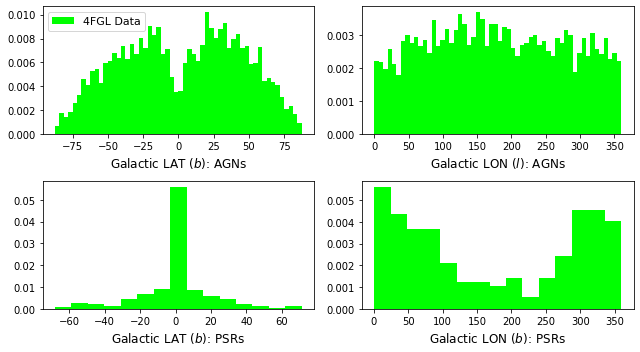

In [30]:
# first check the distribution of GLAT and GLON of the AGNs (selected by Tags)
fig = plt.figure(figsize=(9, 5))

fig.add_subplot(2, 2, 1)
plt.hist(v22LP_df_AGNs['GLAT'], bins=LP_df_AGNS_bins, color='lime', 
         density=True, label='4FGL Data')
# plt.hlines(0.5, -1., 1., linestyle='--', color='red', alpha=0.7)
# plt.text(0.00, 0.6, r'0.5', fontsize=12)
plt.xlabel(r'Galactic LAT $(b)$: AGNs', fontsize=12)
plt.legend(fontsize=11)

fig.add_subplot(2, 2, 2)
plt.hist(v22LP_df_AGNs['GLON'], bins=LP_df_AGNS_bins, color='lime', density=True)
plt.xlabel(r'Galactic LON $(l)$: AGNs', fontsize=12)

fig.add_subplot(223)
plt.hist(v22PLEC_df_PSR['GLAT'], density=True, color='lime', bins=PLEC_df_bins )
plt.xlabel(r'Galactic LAT $(b)$: PSRs', fontsize=12)


fig.add_subplot(224)
plt.hist(v22PLEC_df_PSR['GLON'], density=True, color='lime', bins=PLEC_df_bins)
plt.xlabel(r'Galactic LON $(b)$: PSRs', fontsize=12)

plt.tight_layout()
plt.savefig('4FGL_Spatialdist.png', dpi=180)

##### Mock AGN Catalogue (Spatial Distribution): 

It is assumed that AGNs are distributed uniformly in the sky on a sphere. Thus the position of the individual mock object is determined by drawing the galactic longitude $l$ and $\texttt{sin}$ of latitude $b$ from a uniform distribution of values between $[0, 2\pi]$ and $[-1, 1]$. Drawing values of $b$ from $\texttt{sin}\, b$ distribution, we guarantee a uniform distribution of sources on the surface of the sphere. 

example sin inv b in rad and tot len :  1.3612589425587538 15000
example sin inv b in deg:  77.99439223305795
example gal long in degrees:  33.13593784393344
example val and total length:  220.07232399809766 15000
len of unique list:  15000


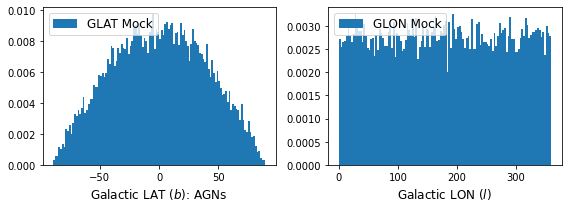

In [78]:
# #create a small set of distribution of galactic longitude and sin of latitude. 

sinb = np.random.uniform(-1, 1, LP_df_mockCat_bins) # distribution of sinb from -1, 1
# print ('sinb : ', sinb)
print ('example sin inv b in rad and tot len : ', np.arcsin(sinb[0]), len(sinb)) # radian 
print ('example sin inv b in deg: ', np.rad2deg(np.arcsin(sinb[0]))) # degree


# b will be drawn from sinb distribution 
mock_GLAT = np.rad2deg(np.arcsin(sinb))

fig = plt.figure(figsize=(8, 3))

fig.add_subplot(121)
plt.hist(mock_GLAT, density=True, label='GLAT Mock', bins=int(np.sqrt(LP_df_mockCat_bins)))
plt.xlabel(r'Galactic LAT $(b)$: AGNs', fontsize=12)
plt.legend(fontsize=12)

gal_long_uniform = np.random.uniform(0.0, 2*np.pi, LP_df_mockCat_bins) # already in radian 
# print ('gal long: ', gal_long)
print ('example gal long in degrees: ', np.rad2deg(gal_long_uniform[5]))

mock_GLON = np.rad2deg(gal_long_uniform)
print ('example val and total length: ', mock_GLON[10], len(mock_GLON))
mock_GLON_unique = np.unique(mock_GLON)
print ('len of unique list: ', len(mock_GLON_unique) )

fig.add_subplot(122)
plt.hist(mock_GLON, density=True, label='GLON Mock', bins=int(np.sqrt(LP_df_mockCat_bins)) )
plt.xlabel('Galactic LON $(l)$', fontsize=12)
plt.legend(fontsize=12)

plt.tight_layout()

#### Mock PSR Distribution (Spatial): 

original number of bins:  15
bin counts:  [0.00090069 0.00270208 0.00225173 0.00135104 0.00450346 0.00675519
 0.00900692 0.05584293 0.00855658 0.0058545  0.00450346 0.00225173
 0.00135104 0.00045035 0.00135104]
bins:  [-68.07345   -58.782593  -49.49174   -40.200886  -30.910032  -21.619179
 -12.328325   -3.037471    6.2533827  15.544237   24.83509    34.125946
  43.416798   52.707653   61.998505   71.28936  ]
check fitted params 1st and 2nd gaussian :  [4.82533813e-02 1.51676404e+00 3.56443164e+00 7.61385903e-03
 3.37963266e-01 2.68265452e+01] [0.04825338 1.51676404 3.56443164] [7.61385903e-03 3.37963266e-01 2.68265452e+01]
0.8792962070863051 1.1306335352571377
bin counts LON:  [0.00560556 0.00437934 0.00367865 0.00367865 0.00210208 0.00122622
 0.00122622 0.00105104 0.00140139 0.00052552 0.00140139 0.00245243
 0.00455452 0.00455452 0.004029  ]
bins LON:  [  1.0285585  24.913998   48.79944    72.684875   96.57031   120.45576
 144.3412    168.22664   192.11208   215.99751   239.88295   26

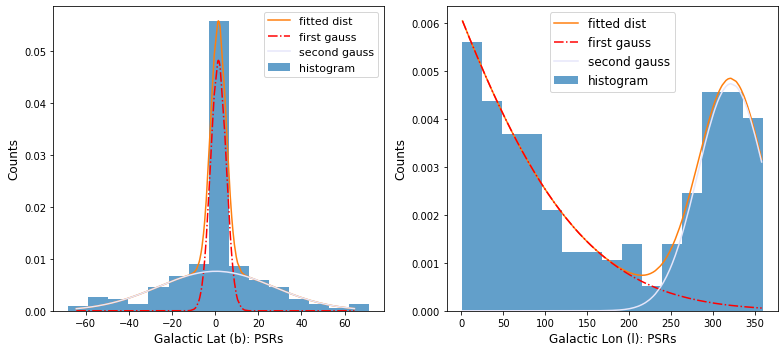

In [62]:
# PLEC_LAT = v22PLEC_df_PSR['GLAT'].to_numpy()
# print (PLEC_LAT.shape)
print ('original number of bins: ', PLEC_df_bins)

pleclatcoord = sorted(np.random.uniform(-70, 70, 300)) # from uniform but sorted (alternative np.linspace)

fig = plt.figure(figsize=(11, 5))

fig.add_subplot(121)

from scipy.optimize import curve_fit

def gauss2mix(x, *p):
    A1, mu1, sigma1, A2, mu2, sigma2 = p
    return A1*np.exp(-(x-mu1)**2/(2.*sigma1**2)) + A2*np.exp(-(x-mu2)**2/(2.*sigma2**2))


nLAT, binsLAT, _ = plt.hist(v22PLEC_df_PSR['GLAT'], bins=PLEC_df_bins, label='histogram', alpha=0.7, 
                            density=True)

# plt.clf()

bin_centerPLECLAT = (binsLAT[:-1] + binsLAT[1:])/2

print ('bin counts: ', nLAT)
print ('bins: ', binsLAT)

p0 = [0.06, 0, 2, 0.01, 0, 13]
params, params_cov = curve_fit(gauss2mix, bin_centerPLECLAT, nLAT, p0=p0)

print ('check fitted params 1st and 2nd gaussian : ', params, params[0:3], params[3:])

def firstgauss(x, p1):
    a1, mu1, sigma1 = p1
    return a1*np.exp(-(x-mu1)**2/(2.*sigma1**2))
def secondgauss(x, p2):
    a2, mu2, sigma2 = p2
    return a2*np.exp(-(x-mu2)**2/(2.*sigma2**2))

# possible_hist_lat = [i*j for i, j in zip(pleclatcoord, his_fitPLECLAT)]

# ### get the fitted curve 
his_fitPLECLAT = gauss2mix(pleclatcoord, *params)
first_hist = firstgauss(pleclatcoord, params[0:3])
second_hist = secondgauss(pleclatcoord, params[3:])

print (sum(first_hist), sum(second_hist))


# print ('length of generated data and max, min', len(his_fitPLECLAT), np.max(his_fitPLECLAT), 
#       np.min(his_fitPLECLAT))

# plt.plot(bin_centerPLECLAT, n, label='true dist')
plt.plot(pleclatcoord, his_fitPLECLAT, label='fitted dist')
plt.plot(pleclatcoord, first_hist, color='red', linestyle = '-.', label='first gauss')
plt.plot(pleclatcoord, second_hist, color='lavender', label='second gauss')

# plt.bar(pleclatcoord, height=his_fitPLECLAT, color='lime')
plt.xlabel('Galactic Lat (b): PSRs', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.legend(fontsize=11, loc='best')





plecloncoord = sorted(np.random.uniform(0, 360, 300))

fig.add_subplot(122)
nLON, binsLON, _ = plt.hist(v22PLEC_df_PSR['GLON'], bins=PLEC_df_bins, label='histogram', alpha=0.7, 
                            density=True)

bin_centerPLECLON = (binsLON[:-1] + binsLON[1:])/2

print ('bin counts LON: ', nLON)
print ('bins LON: ', binsLON)

def gaussoffset2mix(x, *p):
    A1, mu1, sigma1, A2, mu2, sigma2 = p
    g1 = A1*np.exp(-(x-mu1)**2/(2.*sigma1**2)) 
    g2 = A2*np.exp(-(x-mu2)**2/(2.*sigma2**2))
    return g1 + g2



p0lon = [5e-2, -90, 50, 1e-2, 330, 100]

paramsLON, params_covLON = curve_fit(gaussoffset2mix, bin_centerPLECLON, nLON, p0=p0lon)
print ('check fitted params 1st and 2nd gaussian LON: ', paramsLON[0:3], paramsLON[3:])

def firstgaussoffset(x, p1):
    a1, mu1, sigma1 = p1
    return a1*np.exp(-(x-mu1)**2/(2.*sigma1**2))

def secondgaussoffset(x, p2):
    a2, mu2, sigma2 = p2
    return a2*np.exp(-(x-mu2)**2/(2.*sigma2**2))


### get the fitted curve 
his_fitPLECLON = gaussoffset2mix(plecloncoord, *paramsLON)
first_histLON  = firstgaussoffset(plecloncoord, paramsLON[0:3])
second_histLON = secondgaussoffset(plecloncoord, paramsLON[3:])

# plt.plot(bin_centerPLECLON, nLON, label='true dist')
plt.plot(plecloncoord, his_fitPLECLON, label='fitted dist')
plt.plot(plecloncoord, first_histLON, color='red', linestyle = '-.', label='first gauss')
plt.plot(plecloncoord, second_histLON, color='lavender', label='second gauss')
# plt.hist(his_fitPLECLON, bins=PLEC_df_bins, histtype='stepfilled', 
#          edgecolor='red', fill=False, alpha=0.8, label='Mock Cat.')
# plt.bar(plecloncoord, height=his_fitPLECLON, color='lime')

plt.xlabel('Galactic Lon (l): PSRs', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.legend(fontsize=12, loc='best')

plt.tight_layout()

plt.savefig('LATLONfitted_dist_psr.png', dpi=160)

# # mock_LON_psr = random.sample()

check min and max of LAT hist:  73.5207407493366 -93.02027837837059
check min and max of LAT hist after selection:  73.5207407493366 -73.66634457412073
selected number of LATs:  799
check few values:  [-1.70768296  1.45130817  0.10490063]
check min and max of LON hist:  442.243835448311 -941.5956012579221
check min and max of LON hist after selection:  359.52443183078475 0.10202820108918331
selected number of LONs:  724


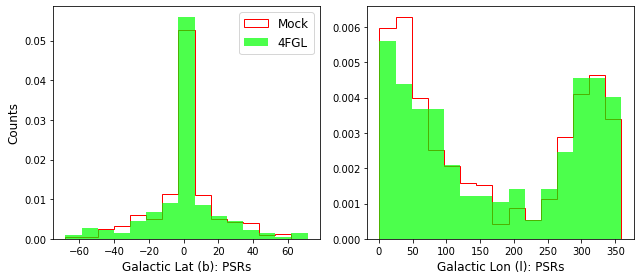

In [67]:
# his_fitPLECLATsum = sum(his_fitPLECLAT)
# his_fitPLECLATfac = 1/his_fitPLECLATsum

# print (sum((his_fitPLECLAT)*his_fitPLECLATfac))

fig = plt.figure(figsize=(9, 4))

fig.add_subplot(121)
possible_PSR_lat1 = np.random.normal(1.51676404,  3.56443164, 550)
# possible_PSR_lat1_selected = random.sample(possible_PSR_lat1.tolist(), 200)
possible_PSR_lat1_selected = np.random.choice(possible_PSR_lat1, 400)
# print (possible_PSR_lat1)
# possible_PSR_lat1_selected = np.random.choice(possib)
# plt.hist(possible_PSR_lat1, bins=binsLAT, density=True, color='r', alpha=0.7)
possible_PSR_lat2 = np.random.normal(3.37963266e-01, 2.68265452e+01, 550)
# possible_PSR_lat2_selected = random.sample(possible_PSR_lat2.tolist(), 200)
possible_PSR_lat2_selected = np.random.choice(possible_PSR_lat2, 400)
# plt.hist(possible_PSR_lat2, bins=binsLAT, density=True, alpha=0.6)

total_hist = (possible_PSR_lat1) + (possible_PSR_lat2)
total_histLAT1 = np.concatenate((possible_PSR_lat1_selected, possible_PSR_lat2_selected))
print ('check min and max of LAT hist: ', max(total_histLAT1), min(total_histLAT1))
total_histLAT1f = total_histLAT1[(total_histLAT1>-80.) & (total_histLAT1<80.)]
print ('check min and max of LAT hist after selection: ', max(total_histLAT1f), min(total_histLAT1f))
print ('selected number of LATs: ', len(total_histLAT1f))

# draw = np.random.choice(total_hist, 290, p=(his_fitPLECLAT*his_fitPLECLATfac))
# draw = random.sample(total_hist.tolist(), 200)

plt.hist(total_histLAT1, bins=binsLAT, density=True, histtype='stepfilled', fill=False, 
         edgecolor='red', label='Mock')
plt.hist(v22PLEC_df_PSR['GLAT'], bins=PLEC_df_bins, density=True, color='lime', alpha=0.7, label='4FGL')
plt.legend(fontsize=12)
plt.xlabel('Galactic Lat (b): PSRs', fontsize=12)
plt.ylabel('Counts', fontsize=12)
print ('check few values: ', total_histLAT1[0:3])

fig.add_subplot(122)
num_select = 4680
seed = 26
np.random.seed(seed)
def psrLON1(num_select):
    possible_PSR_LON1 = np.random.normal(-2.19250209e+02, 1.74911680e+02, num_select)  
    possible_PSR_LON1_selected = np.random.choice(possible_PSR_LON1, int(num_select*0.93) )
    return possible_PSR_LON1_selected
# plt.hist(possible_PSR_LON1, bins=binsLON, density=True, alpha=0.7)
# possible_PSR_
def psrLON2(num_select):
    possible_PSR_LON2 = np.random.normal(3.21788428e+02, 3.96174001e+01, num_select)
    possible_PSR_LON2_selected = np.random.choice(possible_PSR_LON2, int(num_select*0.07) )
    return possible_PSR_LON2_selected
# plt.hist(possible_PSR_LON2, bins=binsLON, density=True, alpha=0.7, color='red')

total_hist_LON = np.concatenate((psrLON1(num_select), psrLON2(num_select) ))
total_histLONf = total_hist_LON[(total_hist_LON>-0.) & (total_hist_LON<360.)]


plt.hist(total_histLONf, bins=binsLON, density=True, histtype='stepfilled', fill=False, 
         edgecolor='red', label='Mock')
plt.hist(v22PLEC_df_PSR['GLON'], bins=PLEC_df_bins, density=True, color='lime', alpha=0.7, label='4FGL')
plt.xlabel('Galactic Lon (l): PSRs', fontsize=12)
plt.tight_layout()
plt.savefig('Mock_4FGL_PSR_LATLON.png', dpi=180)


print ('check min and max of LON hist: ', max(total_hist_LON), min(total_hist_LON))
print ('check min and max of LON hist after selection: ', max(total_histLONf), min(total_histLONf))
print ('selected number of LONs: ', len(total_histLONf))

#### Linear Regression on Binned $E_{100}$ Distribution 

Find the Best Fit Model of Linear Regression in $\text{log} N - \text{log} E_{100}$ space.   

min and max val of lowest bin width:  -12.187548 -8.952785
9 235.0
selected hist1:  (23,)
shape of selected bins:  (23,)
check fit values: intercept:  -8.579805
check fit values: coeff:  -0.9516571
fitted hist vals:  [2.4138784, 2.3589067, 2.303936, 2.2489643, 2.1939936, 2.1390219, 2.084052, 2.0290804, 1.9741087, 1.919138, 1.8641663, 1.8091955, 1.7542238, 1.6992531, 1.6442814, 1.5893106, 1.5343399, 1.4793682, 1.4243975, 1.3694258, 1.314455, 1.2594833, 1.2045126]


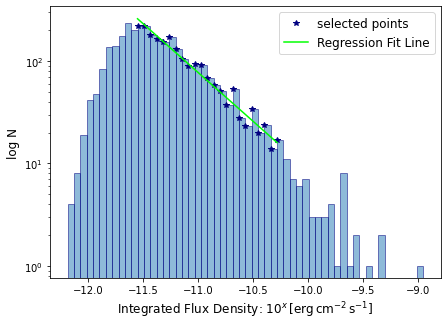

In [68]:
fig = plt.figure(figsize=(7, 5))
ax1 = fig.add_subplot(111)
# ax1.set_yscale('log')

E100hist, E100bins,_ = plt.hist(np.log10(v22LP_df_AGNs['En_flux_100']), bins=LP_df_AGNS_bins, 
                                density=False, alpha=0.5, edgecolor='navy')

print ('min and max val of lowest bin width: ', E100bins[0], E100bins[-1])
# print ('check hist1 : ', hist1)

# print ('check bins1: ', bins1)

print (np.argmax(E100hist), np.max(E100hist))

selected_hist1 = E100hist[11:34]
selected_hist1_list = [np.log10(k) for k in selected_hist1]
print ('selected hist1: ', selected_hist1.shape)
# print ('selected hist1 list: ', selected_hist1_list)
selected_bins1 = E100bins[11:34] 
print ('shape of selected bins: ', selected_bins1.shape)
selected_bins1_list = [i for i in selected_bins1]
# print ('selected bins1 list: ', selected_bins1_list)

# selected_hist1_listpow10 = [i**10 for i in selected_hist1_list]

# plt.clf()

# # ax1 = plt.subplot(111)

ax1.plot(selected_bins1_list, np.power(10, selected_hist1_list), linestyle='None', marker='*', color='navy', 
        label='selected points')
ax1.set_yscale('log')

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(np.reshape(selected_bins1, (-1, 1)), selected_hist1_list)
# # reg.fit(selected_bins1_list, selected_hist1_list)
print ('check fit values: intercept: ', reg.intercept_)
print ('check fit values: coeff: ', reg.coef_[0])

# fit_arr = np.polyfit(np.array(selected_bins1_list), np.array(selected_hist1_list), 1)
# print (type(float(fit_arr[0])))


hist_vals = [(reg.coef_[0] * i + reg.intercept_) for i in selected_bins1_list]

# hist_vals = [reg.coef_ * i + reg.intercept_ for i in selected_bins1_list]
print ('fitted hist vals: ', hist_vals)

plt.plot(selected_bins1_list, np.power(10, hist_vals), color='lime', label='Regression Fit Line')



# # # print ( hist_vals)
# # hist_vals_list = [h[0] for h in hist_vals]
# # # print (hist_vals_list)

# # # # extend the line 
# # def ext_line(ax, x, y, **args):
# #     xlim = ax.get_xlim()
# #     ylim = ax.get_ylim()
    
# #     x_ext = np.linspace(xlim[0], xlim[1], 50)
# #     p = np.polyfit(x, y, deg=1) # fit polynomial of degree 1, i.e. straight line
# #     y_ext = np.poly1d(p)(x_ext)
# #     ax.plot(x_ext, y_ext, **args)
# #     ax.set_xlim(xlim)
# #     ax.set_ylim(ylim)
# #     return ax
# # ext_line(ax1, selected_bins1_list, hist_vals_list, color='r', label='extended', linestyle='--')
# # plt.legend(fontsize=12)

plt.legend(fontsize=12)
plt.xlabel(r'Integrated Flux Density: $10^{x}\, [\mathrm{erg}\, \mathrm{cm}^{-2}\, \mathrm{s}^{-1}]$', 
           fontsize=12)
plt.ylabel(r'log N', fontsize=12)
plt.savefig('FitRegression_4FGL_AGN.png', dpi=170)

In [69]:
print ('check the Energy Flux bins and length: ', len(E100bins)) # len nbins + 1, nbins = E100hist 
# should be considered as binwidths

print ('number of entries: ', len(v22LP_df_AGNs['En_flux_100']))  

print ('check for duplicated values: ', v22LP_df_AGNs.duplicated(subset=['En_flux_100']).any() )
# no duplicate values: 

print ('check the length of histogram values: ', len(E100hist))  # number of sources in each energy bin
# once again the number of bins are higher 

print ('\n')

print ('check the histogram values: ', type(E100hist))
print ('sum of the histogram values: ', sum(E100hist))

E100hist_list = E100hist.tolist()
# print ('list of values :', E100hist_list)

print ('bins: ', E100bins)

check the Energy Flux bins and length:  57
number of entries:  3202
check for duplicated values:  False
check the length of histogram values:  56


check the histogram values:  <class 'numpy.ndarray'>
sum of the histogram values:  3202.0
bins:  [-12.187548  -12.129784  -12.072021  -12.0142565 -11.956493  -11.898729
 -11.840966  -11.783202  -11.725439  -11.667675  -11.609911  -11.552148
 -11.494384  -11.436621  -11.378857  -11.321094  -11.2633295 -11.205566
 -11.147802  -11.090038  -11.032275  -10.974511  -10.916748  -10.858984
 -10.801221  -10.743457  -10.685694  -10.62793   -10.570166  -10.512403
 -10.4546385 -10.396875  -10.339111  -10.281348  -10.223584  -10.165821
 -10.108057  -10.050294   -9.99253    -9.934766   -9.877003   -9.819239
  -9.761476   -9.7037115  -9.645948   -9.588184   -9.530421   -9.472657
  -9.414893   -9.35713    -9.299366   -9.241603   -9.183839   -9.126076
  -9.068312   -9.010549   -8.952785 ]


In [70]:
E100bins_notlast = list(E100bins)
E100bins_notlast.remove(E100bins_notlast[-1])

print ('all but last : ', E100bins_notlast)

all but last :  [-12.187548, -12.129784, -12.072021, -12.0142565, -11.956493, -11.898729, -11.840966, -11.783202, -11.725439, -11.667675, -11.609911, -11.552148, -11.494384, -11.436621, -11.378857, -11.321094, -11.2633295, -11.205566, -11.147802, -11.090038, -11.032275, -10.974511, -10.916748, -10.858984, -10.801221, -10.743457, -10.685694, -10.62793, -10.570166, -10.512403, -10.4546385, -10.396875, -10.339111, -10.281348, -10.223584, -10.165821, -10.108057, -10.050294, -9.99253, -9.934766, -9.877003, -9.819239, -9.761476, -9.7037115, -9.645948, -9.588184, -9.530421, -9.472657, -9.414893, -9.35713, -9.299366, -9.241603, -9.183839, -9.126076, -9.068312, -9.010549]


In [71]:
# find the bin widths 
E100bin_widths = []
for i in range(1, len(E100bins)):
    bin_width = E100bins[i] - E100bins[i-1]
    E100bin_widths.append(bin_width)
print ('check the bin width list: ', E100bin_widths) 

check the bin width list:  [0.057764053, 0.0577631, 0.057764053, 0.0577631, 0.057764053, 0.0577631, 0.057764053, 0.0577631, 0.057764053, 0.057764053, 0.0577631, 0.057764053, 0.0577631, 0.057764053, 0.0577631, 0.057764053, 0.0577631, 0.057764053, 0.057764053, 0.0577631, 0.057764053, 0.0577631, 0.057764053, 0.0577631, 0.057764053, 0.0577631, 0.057764053, 0.057764053, 0.0577631, 0.057764053, 0.0577631, 0.057764053, 0.0577631, 0.057764053, 0.0577631, 0.057764053, 0.0577631, 0.057764053, 0.057764053, 0.0577631, 0.057764053, 0.0577631, 0.057764053, 0.0577631, 0.057764053, 0.0577631, 0.057764053, 0.057764053, 0.0577631, 0.057764053, 0.0577631, 0.057764053, 0.0577631, 0.057764053, 0.0577631, 0.057764053]


#### PSR Binned E100 Disrtibution and Info: 

min and max val of lowest bin width:  -12.175684 -8.027891
all bins PLEC E100 :  [-12.175684 -11.899164 -11.622645 -11.346126 -11.069606 -10.793086
 -10.516567 -10.240047  -9.963528  -9.687008  -9.410489  -9.133969
  -8.85745   -8.58093   -8.304411  -8.027891]


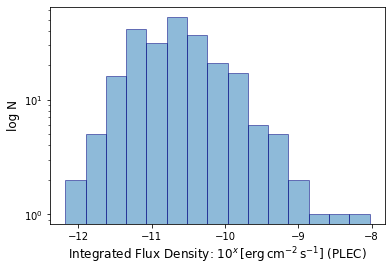

In [72]:
fig = plt.figure(figsize=(6, 4))

E100histPLEC, E100binsPLEC,_ = plt.hist(np.log10(v22PLEC_df_PSR['En_flux_100']), bins=PLEC_df_bins, 
                                density=False, alpha=0.5, edgecolor='navy')

print ('min and max val of lowest bin width: ', E100binsPLEC[0], E100binsPLEC[-1])

plt.yscale('log')
plt.xlabel(r'Integrated Flux Density: $10^{x}\, [\mathrm{erg}\, \mathrm{cm}^{-2}\, \mathrm{s}^{-1}]$ (PLEC)', 
           fontsize=12)
plt.ylabel(r'log N', fontsize=12)


E100histPLEC_list = E100histPLEC.tolist()

E100bins_notlastPLEC = list(E100binsPLEC)
E100bins_notlastPLEC.remove(E100bins_notlastPLEC[-1])

print ('all bins PLEC E100 : ', E100binsPLEC)

In [129]:
# Check how to replicate the Pivot Energy Distribution 
# from scipy.stats import truncnorm
# clip_PEn_a = 0
# clip_PEn_b = 10000 # MeV
# PEn_Mean = LP_PEn_mean
# PEn_Std = LP_PEn_std

# a, b = (clip_PEn_a - PEn_Mean) / PEn_Std, (clip_PEn_b - PEn_Mean) / PEn_Std
# PEn_range = np.linspace(-1, 20000, 3000)
# plt.hist(truncnorm.pdf(PEn_range, a, b, loc=PEn_Mean, scale=PEn_Std), bins = 56, density=True)
# plt.xscale('log')

# truncnorm isn't a good idea

# from scipy.stats import halfnorm
# PEn_mock = halfnorm.rvs(loc=0, scale=PEn_Std, size=3000)
# plt.hist(PEn_mock, density=True, bins=56)
# plt.xscale('log')
# neither is halfnorm but exponential distriburion works, using now 

# LPPivEn_mock_dist2 = expon.rvs(loc=10, scale=LP_PEn_std-2, size=3200)

# # rather than normal, here exponential distribution works best 
# plt.hist(LPPivEn_mock_dist3, density=True, bins=56,)
# plt.hist(v22LP_df_AGNs['Piv_En'], density=True, bins=56, color='orange')
# # plt.xscale('log')

# logshape1, logloc1, logscale1 = lognorm.fit(v22LP_df_AGNs['Piv_En'], loc=0)
# print ('check fit shape, loc and scale, log(scale): ', logshape1, logloc1, logscale1, np.log(logscale1))

# LPPivEn_mock_dist3 = np.random.lognormal(np.log(logscale1), logshape1, 3200)
# plt.hist(LPPivEn_mock_dist3, density=True, bins=56, color='navy')

In [104]:
#### try log normal for AGN LP Beta Distribution
# LPBeta_mock_dist2 = np.random.lognormal(-3, 1.05, 3200)
# LPBeta_mock_dist2 = np.random.gamma(LP_beta_mean, np.sqrt(LP_beta_var), 3200)
# LPBeta_mock_dist2 = np.random.gumbel(LP_beta_mean, np.sqrt(LP_beta_var), 3200)
# sns.distplot(LPBeta_mock_dist2, norm_hist=True, bins=56, color='navy', hist=False)
# plt.hist(v22LP_df_AGNs['LP_beta'], density=True, bins=56, color='purple')


# try fitting the log normal distribution 
# from scipy.stats import lognorm, gumbel_r

# logshape, logloc, logscale = lognorm.fit(v22LP_df_AGNs['LP_beta'],)
# print ('check fit shape, loc and scale, log(scale): ', logshape, logloc, logscale, np.log(logscale))

# LPBeta_mock_dist2 = np.random.lognormal(np.log(logscale)-0.49, logshape+.34, 3200)
# plt.hist(LPBeta_mock_dist2, density=True, bins=56, color='navy')

# gumshape, gumloc = gumbel_r.fit(v22LP_df_AGNs['LP_beta'])
# print ('check gum fit shape, loc, : ', gumshape, gumloc)

# LPBeta_mock_dist2 = np.random.gumbel(gumshape, gumloc)
# plt.hist(LPBeta_mock_dist2, density=True, bins=56, color='navy')
# LPBeta_mock_dist2 = np.random.gumbel(LP_beta_mean-0.077, np.sqrt(LP_beta_var)-0.1, size=3200) # best for beta 
# # # plt.hist(LPBeta_mock_dist2, density=True, bins=56, color='navy')
# sns.distplot(LPBeta_mock_dist2, norm_hist=True, bins=56, color='navy', hist=False)

#### Understanding the 'Energy_Flux100' Variable: 

LP Formulation : $f_{\text{LP}} (E) = \frac{dN}{dE} = K\, \left(\frac{E}{E_0} \right)^{-\alpha -\beta \, \text{log}\, \left(\frac{E}{E_0}\right) } $. 

Integrating as $\int \limits _{100}^{1e5}  E \times f_{\text{LP}}(E) $ (unit of limits are in MeV) should give us Energy flux with unit $\text{MeV}\, \text{cm}^{-2}\, \text{s}^{-1}$, converting this to $\text{erg}\, \text{cm}^{-2}\, \text{s}^{-1}$ (by multiplying with 1.60e-6), should be approximately equal to Energy_Flux100 variable. 

In [73]:
### just checking some simple integration of log parabola formulation
### from the AGN dataframe take the parameters from any row with spectype=logparabola. 
### here the values are used from row 16 of v22LP_df_AGNs DataFrame 

alpha1 = 1.934635
beta1 = 0.079399
PivEn = 1403.923462 # MeV
FluxDensity = 1.098710e-12 # cm^-2 MeV^-1 s^-1 # LP sigma value ~ 5.1 > 3


# def LP(En, alpha, beta, PivEn, FluxDensity):
#     x = En*FluxDensity * ((En/PivEn)**(- alpha - ( beta *(math.log(En/PivEn)) ) ))
#     return x 

def Integrate(N, a, b, alpha=alpha1, beta=beta1, PivEn=PivEn, 
              FluxDensity=FluxDensity): # number of steps, lower and upper limit 
    value = 0
    value2 = 0
    
    for i in range(1, N+1):
        En1 = a + ( (i-1/2)* ( (b-a)/ N ) )
        x = En1*FluxDensity * ((En1/PivEn)**(- alpha - ( beta *(math.log(En1/PivEn)) ) ))
#         value += LP(En1 , alpha1, beta1, PivEn, FluxDensity)
        value += x
    value2 = ( (b-a)/N ) * value
    return value2

result = Integrate(600, 100, 100e3) # 100 MeV to 100 GeV
print ('check result in MeV cm^-2 s^-1 :', result)
print ('check result in Erg cm^-2 s^-1: ', result*1.60e-6)
print ('Given Value in Erg cm^-2 s^-1: ', 1.826604e-11)

check result in MeV cm^-2 s^-1 : 1.1348039370315654e-05
check result in Erg cm^-2 s^-1:  1.8156862992505046e-11
Given Value in Erg cm^-2 s^-1:  1.826604e-11


PLEC Parametrization: $\frac{dN}{dE} = K\, \left(\frac{E}{E_0}\right)^{-\Gamma}\, \text{exp} \left( a\, \left(E_0^b - E^b \right) \right) $

Check the integration $\int \limits _{100}^{1e5}  E \times f_{\text{LP}}(E) $ (unit of limits are in MeV) should give us Energy flux with unit $\text{MeV}\, \text{cm}^{-2}\, \text{s}^{-1}$, converting this to $\text{erg}\, \text{cm}^{-2}\, \text{s}^{-1}$ (by multiplying with 1.60e-6), should be approximately equal to Energy_Flux100 variable. 

 

In [74]:
### checking integration for PLEC parametrization 
### here we include values from row 2nd of v22PLEC_df_PSR
PLEC_f_density_example = 3.585865e-11 # cm^-2 MeV^-1 s^-1 
PLEC_index_example = 1.044555
PLEC_Exp_b_example = 0.547940
PLEC_Exp_a_example = 0.025027
PLEC_PivEn_example = 1452.299438 # MeV


def IntegratePLEC(N, E1, E2, PivEn = PLEC_PivEn_example, fD = PLEC_f_density_example, 
                 gamma = PLEC_index_example, a = PLEC_Exp_a_example, 
                 b = PLEC_Exp_b_example):
    value = 0.
    value1 = 0. 
    for i in range(1, N+1):
        En1 = E1 + ( (i-1/2)* ( (E2-E1)/ N ) )
        x = En1 * fD * ((En1/PivEn)**(-gamma)) * math.exp(a * (PivEn**b - En1**b))
        value +=x
    value1 = ( (E2-E1)/N ) * value
    return value1


resultPLEC = IntegratePLEC(1100, 100, 100e3) # 100 MeV to 100 GeV
print ('check result in MeV cm^-2 s^-1 :', resultPLEC)
print ('check result in Erg cm^-2 s^-1: ', resultPLEC*1.60e-6)
print ('Given Value in Erg cm^-2 s^-1: ', 4.322299e-10) ###### great !!!!

check result in MeV cm^-2 s^-1 : 0.0002696922795240445
check result in Erg cm^-2 s^-1:  4.315076472384712e-10
Given Value in Erg cm^-2 s^-1:  4.322299e-10


#### Luminosity Function 
Number of sources in a given flux bin $\frac{dN}{dS}$, continue simulating sources until $\frac{dN}{dS}$ is populated, well below the Fermi detection threshold (?). Two types of function were used: 

_Power-Law Extrapolation:_ the slope and intercept in $\text{Log} N-\text{Log} E_{100}$ fitting will come handy here. Later more to discuss!

_'Flat' Extrapolation:_ Luminostiy function remains constant roughly below the Fermi detection threshold. Thus the resulting skymaps which contain a relatively low number of sub-threshold sources. 

1. First, we get the bin-width from the listed $E_{100}$ values. This step is done before. Plot the distribution of $E_{100}$ using `plt.hist`  and get the bins.  

2. List of $N_{\text{Noise}}$ of uniform random numbers with values between [0.8, 1.2] and the length corresponds to the no. of energy flux bins of the original 4FGL distribution of AGN of the $E_{100}$ to the right peak of the histogram. 

3. Extend the synthetic catalogue to $6.0\times 10^{-13}\, \text{erg}\, \text{cm}^{-2}\, \text{s}^{-1}$. Threshold mention in the 4FGL paper is $\approx 2\times 10^{-12}\, \text{erg}\, \text{cm}^{-2}\, \text{s}^{-1}$ at high lats $|b|>10^{\circ}$.  

4. Now the spectral and spatial parameters are drawn from a mock AGN source, compute the resulting value of $E_{100}$ and determine the energy flux histogram bin k it would contribute to. A source is accepted if the number of entries in the respective bin does not overshoot the number of 4FGL source $\times \left(N_{\text{Noise}}\right)_k$ in the original 4FGL histogram or in case the candidate source in question would fall into lowest energy flux bin, the number of sources there is lower than $N_{\text{min}}$. 

5. The synthetic catalogue generation is complete when the lowest $E_{100}$ bin contains $N_{\text{min}}$ entries and all bins above the peak of 4FGL's $\frac{dN}{dS}$ have been fully populated according to the upper threshold determine by $N_{\text{Noise}}$. 

check some values of the noise_N:  0.799601411832375 0.7929949991046843 1.011168165255764


(array([1.08066906, 2.37747192, 2.37747192, 1.51293668, 1.29680287,
        0.64840143, 2.80973955]),
 array([0.70209201, 0.78471279, 0.86733356, 0.94995434, 1.03257511,
        1.11519588, 1.19781666, 1.28043743]),
 <a list of 7 Patch objects>)

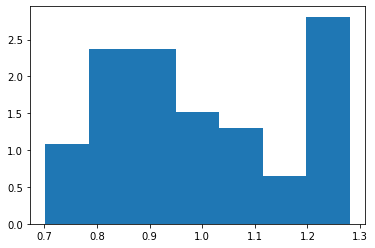

In [75]:
noise_N = np.random.uniform(0.7, 1.3, LP_df_AGNS_bins)    

print ('check some values of the noise_N: ', noise_N[0], noise_N[20], noise_N[40])  
plt.hist(noise_N, density=True, bins=7)

check some values of the noise_N:  0.9748329689344544 0.7274812975136398 0.8821823807635097


(array([1.79460375, 3.58920751, 1.79460375, 0.89730188, 0.89730188,
        1.79460375, 2.69190563]),
 array([0.7274813 , 0.80177811, 0.87607492, 0.95037173, 1.02466854,
        1.09896535, 1.17326216, 1.24755896]),
 <a list of 7 Patch objects>)

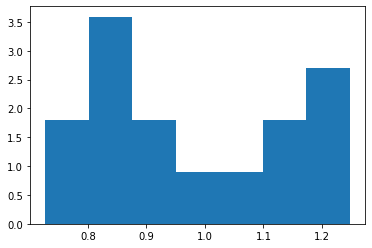

In [76]:
np.random.seed(35) # change seed for different run
noise_N_PLEC = np.random.uniform(0.7, 1.3, PLEC_df_bins)    

print ('check some values of the noise_N: ', noise_N_PLEC[0], noise_N_PLEC[11], noise_N_PLEC[14])  
plt.hist(noise_N_PLEC, density=True, bins=7)

In [26]:
# let's draw a set of parameters from mock distribution and calculate E100 
# generate a random number and draw that element from the list..  
# rand_el = np.random.uniform(0, 3200, 1)
# print ('generated random index: ', int(rand_el[0]))

# rand_LPIndex_mock_dist2 = LPIndex_mock_dist2[int(rand_el[0])]
# rand_LPBeta_mock_dist2 = LPBeta_mock_dist2[int(rand_el[0])]
# rand_LPFDensity_mock_dist2 = LPFDensity_mock_dist2[int(rand_el[0])]
# rand_LPPivEn_mock_dist3 = LPPivEn_mock_dist3[int(rand_el[0])]

# # mock_LP = LP(En, alpha=rand_LPIndex_mock_dist2, beta=rand_LPBeta_mock_dist2, PivEn=rand_LPPivEn_mock_dist3, 
# #             FluxDensity=rand_LPFDensity_mock_dist2)
# mock_E100 = Integrate(N=1000, a=100, b=100e3, alpha=rand_LPIndex_mock_dist2, 
#                       beta=rand_LPBeta_mock_dist2, PivEn=rand_LPPivEn_mock_dist3, 
#                       FluxDensity=rand_LPFDensity_mock_dist2)

# print ('mock value in MeV cm^-2 s^-1 : ', mock_E100)
# print ('mock value in erg cm^-2 s^-1 : ', mock_E100*1.6e-6)

In [27]:
# plt.hist(np.log10(mock_E100*1e-6), bins=E100bins, density=False)

In [79]:
#### randomly select parameters from the distribution [AGN]

rand_LPIndex_mock_dist    = random.sample(LPIndex_mock_dist2.tolist(), 11500)
rand_LPBeta_mock_dist     = random.sample(LPBeta_mock_dist2.tolist(), 11500)
rand_LPFDensity_mock_dist = random.sample(LPFDensity_mock_dist1.tolist(), 11500)
rand_LPPivEn_mock_dist    = random.sample(LPPivEn_mock_dist3.tolist(), 11500)

rand_GLAT                 = random.sample(mock_GLAT.tolist(), 11500)
rand_GLON                 = random.sample(mock_GLON.tolist(), 11500)

In [97]:
#### randomly select parameters from the distribution [PLEC]

rand_PLEC_f_density = random.sample(PLECFden_mock_dist1.tolist(), 490) 
rand_PLEC_index = random.sample(PLECIndex_mock_distf.tolist(), 490)
rand_PLEC_Exp_b = random.sample(PLECExp_b_mock_dist3f.tolist(), 490)
rand_PLEC_Exp_a = random.sample(PLECExp_a_mock_dist3.tolist(), 490)
rand_PLEC_PivEn = random.sample(PLECPivEn_mock_dist3.tolist(), 490)

rand_GLAT_PLEC = random.sample(total_histLAT1f.tolist(), 490)
rand_GLON_PLEC = random.sample(total_histLONf.tolist(), 490)

In [181]:
# plt.hist(np.log10(rand_LPFDensity_mock_dist), bins=LP_df_AGNS_bins, density=True, histtype='stepfilled', fill=False, alpha=0.8, 
#          edgecolor='red')
# plt.hist(np.log10(v22LP_df_AGNs['LP_f_density']), bins=LP_df_AGNS_bins, density=True, label='4FGL', 
#          color= 'lime', alpha=0.6)
# plt.xlabel(r'LP: $10^{-K}\,  [\mathrm{MeV}^{-1}\, \mathrm{cm}^{-2}\, \mathrm{s}^{-1}]$ (Flux density)', 
#            fontsize=12)

In [93]:
def simple_lum(n):
    result_list = []
#     comp_list = [0] * len(E100hist_list)
    final_result_list = []
    c_lp_a   = [] # AGN alpha
    c_lp_b   = [] # AGN beta
    c_lp_F   = [] # flux density
    c_lp_PEn = [] # pivot  energy
    c_GLAT   = [] # lat
    c_GLON   = [] # long
# #     while True:
#     for x1, x2 in zip(comp_list, E100hist_list):
#         if x1 < x2:
#             print ('x2>x1', x2, x1)
#             for x in range(3000):
#                 LP_index = rand_LPIndex_mock_dist[x]
#                 LP_beta  = rand_LPBeta_mock_dist[x]
#                 LP_FD    = rand_LPFDensity_mock_dist[x]
#                 LP_PEn   = rand_LPPivEn_mock_dist[x]
#                 result   = Integrate(n, 100, 100e3, alpha=LP_index, beta=LP_beta, PivEn=LP_PEn, FluxDensity=LP_FD)
#                 # unit here is MeV cm^-2 s^-1 :
#                 result   = result * 1.6e-6 
#                 # unit here is Erg cm^-2 s^-1:
#                 result_list.append(result)
#                 mockE100hist, bins = np.histogram(np.log10(result_list), bins=E100bins, density=False)
#                 mockE100hist_list = mockE100hist.tolist()
#                 final_result_list = [x for x in mockE100hist_list]
#                 compare_list = [y if y<x1 else z for y,x1,z in zip(mockE100hist_list, E100hist_list, comp_list)]

    for x in range(11500):
        LP_index = rand_LPIndex_mock_dist[x]
        LP_beta  = rand_LPBeta_mock_dist[x]
        LP_FD    = rand_LPFDensity_mock_dist[x]
        LP_PEn   = rand_LPPivEn_mock_dist[x]
        LP_glat  = rand_GLAT[x]
        LP_glon  = rand_GLON[x]

        
        
        result   = Integrate(n, 100, 100e3, alpha=LP_index, beta=LP_beta, PivEn=LP_PEn, FluxDensity=LP_FD)
        # unit here is MeV cm^-2 s^-1 :
        result   = result * 1.6e-6 
        # unit here is Erg cm^-2 s^-1:
        if result>=6.493107e-13 and result <= 1.0948474e-09:
            result_list.append(result)

            c_lp_a.append(LP_index)
            c_lp_b.append(LP_beta)
            c_lp_F.append(LP_FD)
            c_lp_PEn.append(LP_PEn)
            c_GLAT.append(LP_glat)
            c_GLON.append(LP_glon)
            
            mockE100hist, bins = np.histogram(np.log10(result_list), bins=E100bins, density=False)
            mockE100hist_list = mockE100hist.tolist()
#         for Ebins in E100bins_notlast:
            for x1, x2, x3 in zip(mockE100hist_list, E100hist_list, noise_N): 
                if (x1*x3) > x2:
                    print ('!!! mock higher than the real !!!', x1, x2)
                    result_list.pop()
#                     print ('result_list len: ', len(result_list))
                    final_result_list = result_list[:]
                    c_lp_a.pop()
                    c_lp_b.pop()
                    c_lp_F.pop()
                    c_lp_PEn.pop()
                    c_GLAT.pop()
                    c_GLON.pop()
        
                else:
                    continue
                    print (':) :) what is happening here :) :)')
                
#                 result_list.pop()    
    return final_result_list, c_lp_a, c_lp_b, c_lp_F, c_lp_PEn, c_GLAT, c_GLON

In [29]:
print (type(LPIndex_mock_dist2.tolist()))

<class 'list'>


In [82]:
# nhist, nbins, mockE100list, log10finalmockE100list = simple_lum(900)
# nhist, nbins, mockE100list, finalmockE100list = simple_lum(900)
# c_lp_a, c_lp_b, c_lp_PEn, c_lp_fd, result_list = simple_lum(700)
final_result_list, c_lp_a, c_lp_b, c_lp_F, c_lp_PEn, c_GLAT, c_GLON = simple_lum(1060)

!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 2 1.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 2 1.0
!!! mock higher than the real !!! 2 1.0
!!! mock higher than the real !!! 2 1.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 2 2.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 2 1.0
!!! mock higher than the real !!! 2 1.0
!!! mock higher than the real !!! 6 6.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 6 6.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 2 1.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 6 4.0
!!! mock higher than the real !!! 2 1.0


!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 19 19.0
!!! mock higher than the real !!! 19 19.0
!!! mock higher than the real !!! 3 3.0
!!! mock higher than the real !!! 19 23.0
!!! mock higher than the real !!! 3 3.0
!!! mock higher than the real !!! 19 19.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 19 19.0
!!! mock higher than the real !!! 3 3.0
!!! mock higher than the real !!! 8 8.0
!!! mock higher than the real !!! 8 8.0
!!! mock higher than the real !!! 20 24.0
!!! mock higher than the real !!! 3 3.0
!!! mock higher than the real !!! 3 3.0
!!! mock higher than the real !!! 19 23.0
!!! mock higher than the real !!! 6 6.0
!!! mock higher than the real !!! 19 19.0
!!! mock higher than the real !!! 2 2.0
!!! mock higher than the real !!! 8 7.0
!!! mock higher than the real !!! 2 1.0
!!! mock higher than the real !!! 8 8.0
!!! mock higher than the real !!! 2 2.0
!!! mock higher than the

!!! mock higher than the real !!! 8 8.0
!!! mock higher than the real !!! 3 3.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 6 6.0
!!! mock higher than the real !!! 8 8.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 19 23.0
!!! mock higher than the real !!! 3 3.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 19 23.0
!!! mock higher than the real !!! 8 8.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 6 7.0
!!! mock higher than the real !!! 19 19.0
!!! mock higher than the real !!! 8 8.0
!!! mock higher than the real !!! 2 1.0
!!! mock higher than the real !!! 19 19.0
!!! mock higher than the real !!! 40 37.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 45 51.0
!!! mock higher than the real !!! 19 23.0
!!! mock higher than the real !!! 12 14.0
!!! mock higher than the

!!! mock higher than the real !!! 19 19.0
!!! mock higher than the real !!! 29 28.0
!!! mock higher than the real !!! 6 7.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 40 37.0
!!! mock higher than the real !!! 3 2.0
!!! mock higher than the real !!! 6 4.0
!!! mock higher than the real !!! 29 28.0
!!! mock higher than the real !!! 40 37.0
!!! mock higher than the real !!! 6 4.0
!!! mock higher than the real !!! 6 6.0
!!! mock higher than the real !!! 50 53.0
!!! mock higher than the real !!! 19 23.0
!!! mock higher than the real !!! 20 24.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 14 11.0
!!! mock higher than the real !!! 19 23.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 19 19.0
!!! mock higher than the real !!! 3 3.0
!!! mock higher than the real !!! 19 19.0
!!! mock higher than the real !!! 8 8.0
!!! mock higher than the real !!! 8 8.0
!!! mock higher 

!!! mock higher than the real !!! 8 8.0
!!! mock higher than the real !!! 20 24.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 49 42.0
!!! mock higher than the real !!! 24 17.0
!!! mock higher than the real !!! 5 4.0
!!! mock higher than the real !!! 49 42.0
!!! mock higher than the real !!! 6 6.0
!!! mock higher than the real !!! 12 14.0
!!! mock higher than the real !!! 2 2.0
!!! mock higher than the real !!! 19 19.0
!!! mock higher than the real !!! 2 1.0
!!! mock higher than the real !!! 19 23.0
!!! mock higher than the real !!! 29 28.0
!!! mock higher than the real !!! 40 37.0
!!! mock higher than the real !!! 29 28.0
!!! mock higher than the real !!! 49 42.0
!!! mock higher than the real !!! 38 48.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 3 3.0
!!! mock higher than the real !!! 37 34.0
!!! mock higher than the real !!! 22 20.0
!!! mock higher than the real !!! 12 14.0
!!! mock h

!!! mock higher than the real !!! 3 3.0
!!! mock higher than the real !!! 24 17.0
!!! mock higher than the real !!! 3 3.0
!!! mock higher than the real !!! 19 19.0
!!! mock higher than the real !!! 19 23.0
!!! mock higher than the real !!! 19 23.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 2 1.0
!!! mock higher than the real !!! 6 4.0
!!! mock higher than the real !!! 14 11.0
!!! mock higher than the real !!! 29 28.0
!!! mock higher than the real !!! 5 4.0
!!! mock higher than the real !!! 37 34.0
!!! mock higher than the real !!! 6 4.0
!!! mock higher than the real !!! 3 3.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 19 23.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 3 3.0
!!! mock higher than the real !!! 49 42.0
!!! mock higher than the real !!! 22 20.0
!!! mock higher than the real !!! 29 28.0
!!! mock higher than the real !!! 40 37.0
!!! mock higher than the real !!! 40 37.0
!!! mock highe

!!! mock higher than the real !!! 68 84.0
!!! mock higher than the real !!! 40 37.0
!!! mock higher than the real !!! 5 4.0
!!! mock higher than the real !!! 3 3.0
!!! mock higher than the real !!! 10 8.0
!!! mock higher than the real !!! 6 7.0
!!! mock higher than the real !!! 19 23.0
!!! mock higher than the real !!! 68 84.0
!!! mock higher than the real !!! 40 37.0
!!! mock higher than the real !!! 38 48.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 8 8.0
!!! mock higher than the real !!! 6 7.0
!!! mock higher than the real !!! 14 11.0
!!! mock higher than the real !!! 63 69.0
!!! mock higher than the real !!! 22 20.0
!!! mock higher than the real !!! 45 51.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 8 8.0
!!! mock higher than the real !!! 24 17.0
!!! mock higher than the real !!! 22 20.0
!!! mock higher than the real !!! 14 11.0
!!! mock higher than the real !!! 2 2.0
!!! mock high

!!! mock higher than the real !!! 40 37.0
!!! mock higher than the real !!! 20 24.0
!!! mock higher than the real !!! 10 8.0
!!! mock higher than the real !!! 68 84.0
!!! mock higher than the real !!! 2 2.0
!!! mock higher than the real !!! 6 6.0
!!! mock higher than the real !!! 20 24.0
!!! mock higher than the real !!! 45 51.0
!!! mock higher than the real !!! 8 8.0
!!! mock higher than the real !!! 63 69.0
!!! mock higher than the real !!! 20 24.0
!!! mock higher than the real !!! 6 4.0
!!! mock higher than the real !!! 24 17.0
!!! mock higher than the real !!! 68 84.0
!!! mock higher than the real !!! 29 28.0
!!! mock higher than the real !!! 38 48.0
!!! mock higher than the real !!! 3 3.0
!!! mock higher than the real !!! 40 37.0
!!! mock higher than the real !!! 37 34.0
!!! mock higher than the real !!! 63 69.0
!!! mock higher than the real !!! 19 23.0
!!! mock higher than the real !!! 68 84.0
!!! mock higher than the real !!! 97 90.0
!!! mock higher than the real !!! 97 90.0
!!!

!!! mock higher than the real !!! 68 84.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 12 14.0
!!! mock higher than the real !!! 63 69.0
!!! mock higher than the real !!! 63 69.0
!!! mock higher than the real !!! 97 90.0
!!! mock higher than the real !!! 8 8.0
!!! mock higher than the real !!! 8 7.0
!!! mock higher than the real !!! 50 53.0
!!! mock higher than the real !!! 8 8.0
!!! mock higher than the real !!! 38 48.0
!!! mock higher than the real !!! 38 48.0
!!! mock higher than the real !!! 50 53.0
!!! mock higher than the real !!! 8 8.0
!!! mock higher than the real !!! 19 19.0
!!! mock higher than the real !!! 20 24.0
!!! mock higher than the real !!! 2 1.0
!!! mock higher than the real !!! 68 84.0
!!! mock higher than the real !!! 49 42.0
!!! mock higher than the real !!! 45 51.0
!!! mock higher than the real !!! 85 59.0
!!! mock higher than the real !!! 63 69.0
!!! mock higher than the real !!! 22 20.0
!!! mock higher than the real !!! 6 7.0
!!! mo

!!! mock higher than the real !!! 3 2.0
!!! mock higher than the real !!! 29 28.0
!!! mock higher than the real !!! 97 90.0
!!! mock higher than the real !!! 3 3.0
!!! mock higher than the real !!! 49 42.0
!!! mock higher than the real !!! 63 69.0
!!! mock higher than the real !!! 3 3.0
!!! mock higher than the real !!! 3 3.0
!!! mock higher than the real !!! 85 59.0
!!! mock higher than the real !!! 114 91.0
!!! mock higher than the real !!! 49 42.0
!!! mock higher than the real !!! 85 59.0
!!! mock higher than the real !!! 3 3.0
!!! mock higher than the real !!! 8 8.0
!!! mock higher than the real !!! 50 53.0
!!! mock higher than the real !!! 38 48.0
!!! mock higher than the real !!! 29 28.0
!!! mock higher than the real !!! 85 59.0
!!! mock higher than the real !!! 63 69.0
!!! mock higher than the real !!! 29 28.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 6 7.0
!!! mock higher than the real !!! 63 69.0
!!! mock higher than the real !!! 113 105.0
!!! m

!!! mock higher than the real !!! 119 94.0
!!! mock higher than the real !!! 37 34.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 20 24.0
!!! mock higher than the real !!! 119 94.0
!!! mock higher than the real !!! 40 37.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 50 53.0
!!! mock higher than the real !!! 49 42.0
!!! mock higher than the real !!! 19 23.0
!!! mock higher than the real !!! 49 42.0
!!! mock higher than the real !!! 5 4.0
!!! mock higher than the real !!! 85 59.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 97 90.0
!!! mock higher than the real !!! 3 2.0
!!! mock higher than the real !!! 6 7.0
!!! mock higher than the real !!! 40 37.0
!!! mock higher than the real !!! 19 23.0
!!! mock higher than the real !!! 97 90.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 119 94.0
!!! mock higher than the real !!! 38 48.0
!!! mock higher than the real !!! 1 0.0
!!! m

!!! mock higher than the real !!! 68 84.0
!!! mock higher than the real !!! 20 24.0
!!! mock higher than the real !!! 50 53.0
!!! mock higher than the real !!! 68 84.0
!!! mock higher than the real !!! 2 1.0
!!! mock higher than the real !!! 14 11.0
!!! mock higher than the real !!! 2 1.0
!!! mock higher than the real !!! 97 90.0
!!! mock higher than the real !!! 3 3.0
!!! mock higher than the real !!! 6 4.0
!!! mock higher than the real !!! 19 23.0
!!! mock higher than the real !!! 24 17.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 85 59.0
!!! mock higher than the real !!! 119 94.0
!!! mock higher than the real !!! 37 34.0
!!! mock higher than the real !!! 113 105.0
!!! mock higher than the real !!! 45 51.0
!!! mock higher than the real !!! 5 4.0
!!! mock higher than the real !!! 45 51.0
!!! mock higher than the real !!! 85 59.0
!!! mock higher than the real !!! 2 1.0
!!! mock higher than the real !!! 85 59.0
!!! mock higher than the real !!! 5 4.0
!!! m

!!! mock higher than the real !!! 29 28.0
!!! mock higher than the real !!! 6 4.0
!!! mock higher than the real !!! 5 4.0
!!! mock higher than the real !!! 130 165.0
!!! mock higher than the real !!! 29 28.0
!!! mock higher than the real !!! 130 165.0
!!! mock higher than the real !!! 22 20.0
!!! mock higher than the real !!! 63 69.0
!!! mock higher than the real !!! 20 24.0
!!! mock higher than the real !!! 37 34.0
!!! mock higher than the real !!! 19 19.0
!!! mock higher than the real !!! 20 24.0
!!! mock higher than the real !!! 119 94.0
!!! mock higher than the real !!! 85 59.0
!!! mock higher than the real !!! 38 48.0
!!! mock higher than the real !!! 8 8.0
!!! mock higher than the real !!! 20 24.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 113 105.0
!!! mock higher than the real !!! 2 1.0
!!! mock higher than the real !!! 114 91.0
!!! mock higher than the real !!! 97 90.0
!!! mock higher than the real !!! 114 91.0
!!! mock higher than the real !!! 2

!!! mock higher than the real !!! 20 24.0
!!! mock higher than the real !!! 114 91.0
!!! mock higher than the real !!! 85 59.0
!!! mock higher than the real !!! 8 8.0
!!! mock higher than the real !!! 148 180.0
!!! mock higher than the real !!! 24 17.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 37 34.0
!!! mock higher than the real !!! 14 11.0
!!! mock higher than the real !!! 119 94.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 3 3.0
!!! mock higher than the real !!! 113 105.0
!!! mock higher than the real !!! 6 7.0
!!! mock higher than the real !!! 63 69.0
!!! mock higher than the real !!! 45 51.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 50 53.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 113 105.0
!!! mock higher than the real !!! 20 24.0
!!! mock higher than the real !!! 2 1.0
!!! mock higher than the real !!! 68 84.0
!!

!!! mock higher than the real !!! 63 69.0
!!! mock higher than the real !!! 49 42.0
!!! mock higher than the real !!! 97 90.0
!!! mock higher than the real !!! 6 7.0
!!! mock higher than the real !!! 49 42.0
!!! mock higher than the real !!! 148 180.0
!!! mock higher than the real !!! 8 7.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 19 19.0
!!! mock higher than the real !!! 29 28.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 40 37.0
!!! mock higher than the real !!! 22 20.0
!!! mock higher than the real !!! 133 137.0
!!! mock higher than the real !!! 97 90.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 130 165.0
!!! mock higher than the real !!! 37 34.0
!!! mock higher than the real !!! 37 34.0
!!! mock higher than the real !!! 119 94.0
!!! mock higher than the real !!! 19 19.0
!!! mock higher than the real !!! 130 165.0
!!! mock higher than the real !!! 49 42.0
!!! mock higher than the real !!! 3

!!! mock higher than the real !!! 3 3.0
!!! mock higher than the real !!! 10 8.0
!!! mock higher than the real !!! 8 8.0
!!! mock higher than the real !!! 38 48.0
!!! mock higher than the real !!! 45 51.0
!!! mock higher than the real !!! 63 69.0
!!! mock higher than the real !!! 19 23.0
!!! mock higher than the real !!! 97 90.0
!!! mock higher than the real !!! 121 154.0
!!! mock higher than the real !!! 63 69.0
!!! mock higher than the real !!! 37 34.0
!!! mock higher than the real !!! 97 90.0
!!! mock higher than the real !!! 130 165.0
!!! mock higher than the real !!! 14 11.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 29 28.0
!!! mock higher than the real !!! 113 105.0
!!! mock higher than the real !!! 2 1.0
!!! mock higher than the real !!! 19 19.0
!!! mock higher than the real !!! 161 131.0
!!! mock higher than the real !!! 3 2.0
!!! mock higher than the real !!! 114 91.0
!!! mock higher than the real !!! 148 180.0
!!! mock higher than the real !!! 

!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 63 69.0
!!! mock higher than the real !!! 45 51.0
!!! mock higher than the real !!! 133 137.0
!!! mock higher than the real !!! 133 137.0
!!! mock higher than the real !!! 97 90.0
!!! mock higher than the real !!! 3 3.0
!!! mock higher than the real !!! 148 180.0
!!! mock higher than the real !!! 119 94.0
!!! mock higher than the real !!! 97 90.0
!!! mock higher than the real !!! 3 3.0
!!! mock higher than the real !!! 150 139.0
!!! mock higher than the real !!! 130 165.0
!!! mock higher than the real !!! 6 7.0
!!! mock higher than the real !!! 6 6.0
!!! mock higher than the real !!! 85 59.0
!!! mock higher than the real !!! 20 24.0
!!! mock higher than the real !!! 133 137.0
!!! mock higher than the real !!! 24 17.0
!!! mock higher than the real !!! 8 8.0
!!! mock higher than the real !!! 68 84.0
!!! mock higher than the real !!! 3 3.0
!!! mock higher than the real !!! 19 23.0
!!! mock higher than the real !!! 1

!!! mock higher than the real !!! 6 4.0
!!! mock higher than the real !!! 49 42.0
!!! mock higher than the real !!! 3 3.0
!!! mock higher than the real !!! 45 51.0
!!! mock higher than the real !!! 10 8.0
!!! mock higher than the real !!! 148 180.0
!!! mock higher than the real !!! 38 48.0
!!! mock higher than the real !!! 37 34.0
!!! mock higher than the real !!! 19 19.0
!!! mock higher than the real !!! 5 4.0
!!! mock higher than the real !!! 97 90.0
!!! mock higher than the real !!! 10 8.0
!!! mock higher than the real !!! 3 3.0
!!! mock higher than the real !!! 14 11.0
!!! mock higher than the real !!! 50 53.0
!!! mock higher than the real !!! 37 34.0
!!! mock higher than the real !!! 29 28.0
!!! mock higher than the real !!! 68 84.0
!!! mock higher than the real !!! 19 19.0
!!! mock higher than the real !!! 37 34.0
!!! mock higher than the real !!! 19 23.0
!!! mock higher than the real !!! 6 7.0
!!! mock higher than the real !!! 68 84.0
!!! mock higher than the real !!! 114 91.0
!

!!! mock higher than the real !!! 5 4.0
!!! mock higher than the real !!! 8 8.0
!!! mock higher than the real !!! 113 105.0
!!! mock higher than the real !!! 97 90.0
!!! mock higher than the real !!! 119 94.0
!!! mock higher than the real !!! 8 7.0
!!! mock higher than the real !!! 40 37.0
!!! mock higher than the real !!! 130 165.0
!!! mock higher than the real !!! 3 3.0
!!! mock higher than the real !!! 19 23.0
!!! mock higher than the real !!! 68 84.0
!!! mock higher than the real !!! 130 165.0
!!! mock higher than the real !!! 6 6.0
!!! mock higher than the real !!! 38 48.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 63 69.0
!!! mock higher than the real !!! 8 8.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 20 24.0
!!! mock higher than the real !!! 114 91.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 19 23.0
!!! mock higher than the real !!! 114 91.0
!!! mock higher than the real !!! 6 6.0
!!!

!!! mock higher than the real !!! 204 176.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 161 131.0
!!! mock higher than the real !!! 8 8.0
!!! mock higher than the real !!! 37 34.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 8 8.0
!!! mock higher than the real !!! 29 28.0
!!! mock higher than the real !!! 148 180.0
!!! mock higher than the real !!! 50 53.0
!!! mock higher than the real !!! 50 53.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 85 59.0
!!! mock higher than the real !!! 97 90.0
!!! mock higher than the real !!! 8 7.0
!!! mock higher than the real !!! 114 91.0
!!! mock higher than the real !!! 50 53.0
!!! mock higher than the real !!! 161 131.0
!!! mock higher than the real !!! 50 53.0
!!! mock higher than the real !!! 161 131.0
!!! mock higher than the real !!! 119 94.0
!!! mock higher than the real !!! 68 84.0
!!! mock higher than the real !!! 119 94.0
!!! mock higher than the real !!!

!!! mock higher than the real !!! 38 48.0
!!! mock higher than the real !!! 29 28.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 3 2.0
!!! mock higher than the real !!! 22 20.0
!!! mock higher than the real !!! 40 37.0
!!! mock higher than the real !!! 14 11.0
!!! mock higher than the real !!! 133 137.0
!!! mock higher than the real !!! 121 154.0
!!! mock higher than the real !!! 22 20.0
!!! mock higher than the real !!! 19 23.0
!!! mock higher than the real !!! 20 24.0
!!! mock higher than the real !!! 2 2.0
!!! mock higher than the real !!! 40 37.0
!!! mock higher than the real !!! 85 59.0
!!! mock higher than the real !!! 161 131.0
!!! mock higher than the real !!! 2 1.0
!!! mock higher than the real !!! 12 14.0
!!! mock higher than the real !!! 133 137.0
!!! mock higher than the real !!! 29 28.0
!!! mock higher than the real !!! 40 37.0
!!! mock higher than the real !!! 204 176.0
!!! mock higher than the real !!! 6 6.0
!!! mock higher than the real !!! 

In [83]:
# check_n, chenck_bins, _ = plt.hist(np.log10(finalmockE100list), bins=E100bins, density=False)
# # plt.hist(log10finalmockE100list, )
# # print (type(nhist), len(log10finalmockE100list), len(mockE100list))
# print (sum(nhist), len(finalmockE100list), finalmockE100list)

# fig = plt.figure(figsize=(9, 8))

# fig.add_subplot(2, 2, 1)
# plt.hist(c_lp_a, density=True, bins=LP_df_AGNS_bins)
# print ('len alpha', len(set(c_lp_a)))

# fig.add_subplot(2,2,2)
# plt.hist(c_lp_b, density=True, bins=LP_df_AGNS_bins,)

# fig.add_subplot(2,2,3)
# plt.hist(c_lp_PEn, density=True, bins=LP_df_AGNS_bins)

# fig.add_subplot(224)
# plt.hist(np.log10(c_lp_fd), density=True, bins=LP_df_AGNS_bins)

# plt.tight_layout()

# print (len(result_list))
# print ('check bins: ', bins)
print ('selected  alpha: ', len(c_lp_a))

selected  alpha:  3218


In [84]:
mock_source_num = [i for i in range(len(c_lp_a))]
# mock_source_point = ['PointSource']*len(c_lp_a)
# mock_source_spectype = ['LogParabola']*len(c_lp_a)
# mock_source_spatialtype = ['SkyDirFunction']*len(c_lp_a)

number of selected sources (AGNs);  3218


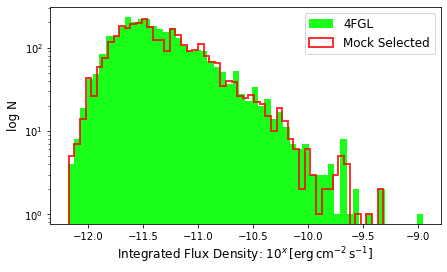

In [86]:
fig = plt.figure(figsize=(7, 4))

plt.hist(np.log10(v22LP_df_AGNs['En_flux_100']), bins=LP_df_AGNS_bins, density=False, 
         label='4FGL', color='lime', alpha=0.9)


plt.hist(np.log10(final_result_list), bins=LP_df_AGNS_bins, density=False, 
         histtype='stepfilled', fill=False, alpha=0.8, edgecolor='red', label='Mock Selected', 
        linewidth=2)


plt.yscale('log')

plt.xlabel(r'Integrated Flux Density: $10^{x}\, [\mathrm{erg}\, \mathrm{cm}^{-2}\, \mathrm{s}^{-1}]$', 
           fontsize=12)
plt.ylabel(r'log N', fontsize=12)

plt.legend(fontsize=12)

plt.savefig('Integrated_E100_mock_4FGL_AGNs.png', dpi=170)

print('number of selected sources (AGNs); ', len(final_result_list))

len of Flux Density:  3218


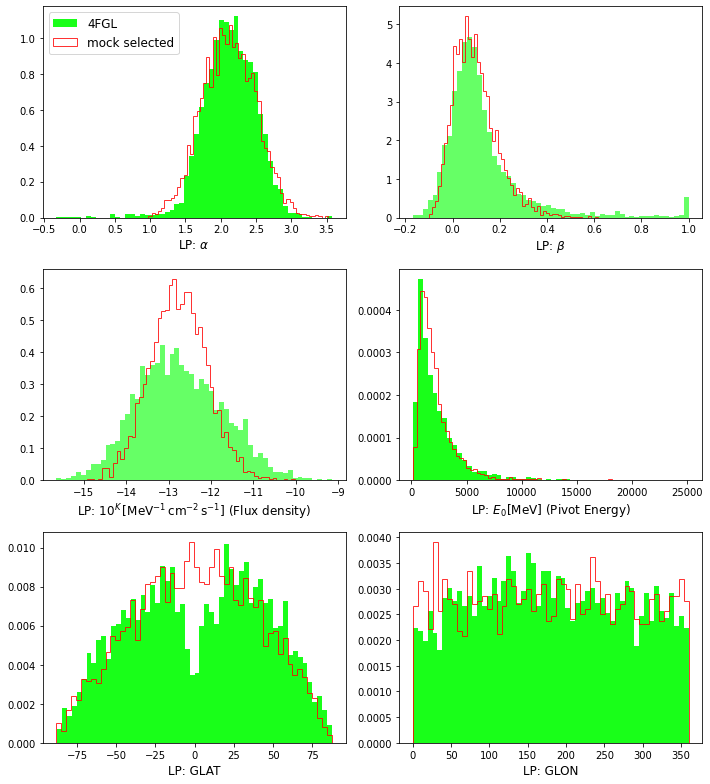

In [89]:
# print for sanity check @ length of all lists of parameters should be same
# compare the 4FGL original distributio and the selected parameters distribution 


fig = plt.figure(figsize=(10, 11))

fig.add_subplot(321)

plt.hist(v22LP_df_AGNs['LP_index'], bins=LP_df_AGNS_bins, density=True, label='4FGL', color= 'lime', alpha=0.9)
plt.hist(c_lp_a, bins=LP_df_AGNS_bins, density=True, label='mock selected', 
        histtype='stepfilled', fill=False, alpha=0.8, edgecolor='red')

plt.xlabel(r'LP: $\alpha$', fontsize=12)
plt.legend(fontsize=12)


fig.add_subplot(322)
plt.hist(v22LP_df_AGNs['LP_beta'], bins=LP_df_AGNS_bins, density=True, label='4FGL', color= 'lime', alpha=0.6)
plt.hist(c_lp_b, bins=LP_df_AGNS_bins, density=True, histtype='stepfilled', fill=False, alpha=0.8, 
         edgecolor='red')

plt.xlabel(r'LP: $\beta$', fontsize=12)
# plt.legend(fontsize=12)

print ('len of Flux Density: ', len(c_lp_F))
fig.add_subplot(323) # log of flux density is plotted 

plt.hist(np.log10(v22LP_df_AGNs['LP_f_density']), bins=LP_df_AGNS_bins, density=True, label='4FGL', 
         color= 'lime', alpha=0.9)

plt.hist(np.log10(c_lp_F), bins=LP_df_AGNS_bins, density=True, histtype='stepfilled', fill=False, alpha=0.8, 
         edgecolor='red')

plt.xlabel(r'LP: $10^{K}\,  [\mathrm{MeV}^{-1}\, \mathrm{cm}^{-2}\, \mathrm{s}^{-1}]$ (Flux density)', 
           fontsize=12)

fig.add_subplot(324)

plt.hist(v22LP_df_AGNs['Piv_En'], bins=LP_df_AGNS_bins, density=True, label='4FGL', color= 'lime', alpha=0.9)

plt.hist(c_lp_PEn, bins=LP_df_AGNS_bins, density=True, histtype='stepfilled', fill=False, alpha=0.8, 
         edgecolor='red')

plt.xlabel(r'LP: $E_0 [\mathrm{MeV}]$ (Pivot Energy)', fontsize=12)

fig.add_subplot(325)
plt.hist(v22LP_df_AGNs['GLAT'], bins=LP_df_AGNS_bins, density=True, label='4FGL', color= 'lime', alpha=0.9)

plt.hist(c_GLAT, bins=LP_df_AGNS_bins, density=True, histtype='stepfilled', fill=False, alpha=0.8, 
         edgecolor='red')

plt.xlabel(r'LP: GLAT', fontsize=12)

fig.add_subplot(326)
plt.hist(v22LP_df_AGNs['GLON'], bins=LP_df_AGNS_bins, density=True, label='4FGL', color= 'lime', alpha=0.9)

plt.hist(c_GLON, bins=LP_df_AGNS_bins, density=True, histtype='stepfilled', fill=False, alpha=0.8, 
         edgecolor='red')

plt.xlabel(r'LP: GLON', fontsize=12)

plt.tight_layout()

plt.savefig('MockSelected_AGN_4FGL_Params.png', dpi=180)

In [73]:
# def simple_lum(n):
#     result_list = []
# #     comp_list = [0] * len(E100hist_list)
#     final_result_list = []
#     c_LP_a     = []
#     c_LP_b     = []
#     c_LP_F     = []
#     c_LP_PivEn = []
# # # #     while True:
# #     for x1, x2 in zip(comp_list, E100hist_list):
# #         if x1 < x2:
# # #             print ('x2>x1', x2, x1)
# #             for x in range(300):
# #                 LP_index = rand_LPIndex_mock_dist[x]
# #                 LP_beta  = rand_LPBeta_mock_dist[x]
# #                 LP_FD    = rand_LPFDensity_mock_dist[x]
# #                 LP_PEn   = rand_LPPivEn_mock_dist[x]
#                 result   = Integrate(n, 100, 100e3, alpha=LP_index, beta=LP_beta, 
#                                      PivEn=LP_PEn, FluxDensity=LP_FD)
# #                 # unit here is MeV cm^-2 s^-1 :
# #                 result   = result * 1.6e-6 
# #                 # unit here is Erg cm^-2 s^-1:
# #                 result_list.append(result)
# #                 mockE100hist, bins = np.histogram(np.log10(result_list), bins=E100bins, density=False)
# #                 mockE100hist_list = mockE100hist.tolist()
# # #                 final_result_list = [x for x in mockE100hist_list]
# #                 comp_list = [
#                     mock if mock<org else z for mock,org,z in zip(mockE100hist_list, E100hist_list, comp_list)]
# #         else:
# #             print ('x1>x2', x1, x2)
    
#     for x in range(34):
#         LP_index = rand_LPIndex_mock_dist[x]
#         LP_beta  = rand_LPBeta_mock_dist[x]
#         LP_FD    = rand_LPFDensity_mock_dist[x]
#         LP_PEn   = rand_LPPivEn_mock_dist[x]
#         result   = Integrate(n, 100, 100e3, alpha=LP_index, beta=LP_beta, PivEn=LP_PEn, FluxDensity=LP_FD)
#         # unit here is MeV cm^-2 s^-1 :
#         result   = result * 1.6e-6 
#         # unit here is Erg cm^-2 s^-1:
#         result_list.append(result)
#         print ('length before if : ', len(result_list))
#         mockE100hist, bins = np.histogram(np.log10(result_list), bins=E100bins, density=False)
#         mockE100hist_list = mockE100hist.tolist()
#         for x1, x2 in zip(mockE100hist_list, E100hist_list): 
#             if x1<x2:
# #                 print ('!!! mock less than the real !!!', x1, x2)
#                 print ('!!! selecting parameters !!! ')
#                 for LP_index in rand_LPIndex_mock_dist:
#                     if LP_index not in c_LP_a:
#                         print ('select c_lp_a')
#                         c_LP_a.append(LP_index)
#                 c_LP_b.append(LP_beta)
#                 c_LP_F.append(LP_FD)
#                 c_LP_PivEn.append(LP_PEn)
#             elif x1>x2 :
#                 print ('!!! mock higher than real !!! ')
#                 result_list.pop()
                
# #                 result_list.pop()    
#     return c_LP_a, c_LP_b, c_LP_PivEn, c_LP_F, result_list
# #     return mockE100hist, bins, result_list, comp_list

In [98]:
def simple_lum_plec(n):
    result_list = []
#     comp_list = [0] * len(E100hist_list)
    f_result_list = []
    c_plec_i   = [] # PLEC index
    c_plec_Expa   = [] # PLEC_Exp_a
    c_plec_Expb   = [] # PLEC_Exp_b
    c_plec_FD   = [] # plec fd
    c_plec_PEn = [] # pivot  energy
    c_GLAT_plec   = [] # lat
    c_GLON_plec   = [] # long

    for x in range(450):
        PLEC_index = rand_PLEC_index[x]
        PLEC_Ea   = rand_PLEC_Exp_a[x]
        PLEC_Eb   = rand_PLEC_Exp_b[x]
        PLEC_FD   = rand_PLEC_f_density[x]
        PLEC_PEn  = rand_PLEC_PivEn[x]
        PLEC_glat = rand_GLAT_PLEC[x]
        PLEC_glon  = rand_GLON_PLEC[x]

        
        
        result   = IntegratePLEC(n, 100, 100e3, PivEn = PLEC_PEn, fD = PLEC_FD, 
                 gamma = PLEC_index, a = PLEC_Ea, b = PLEC_Eb)
        # unit here is MeV cm^-2 s^-1 :
        result   = result * 1.6e-6 
        # unit here is Erg cm^-2 s^-1:
        if result>=6.67298272e-13 and result <= 9.3779735e-09:
            result_list.append(result)

            c_plec_i.append(PLEC_index)
            c_plec_Expa.append(PLEC_Ea)
            c_plec_FD.append(PLEC_FD)
            c_plec_PEn.append(PLEC_PEn)
            c_plec_Expb.append(PLEC_Eb)
            c_GLAT_plec.append(PLEC_glat)
            c_GLON_plec.append(PLEC_glon)
            
            mockE100hist_plec, bins_plec = np.histogram(np.log10(result_list), bins=E100binsPLEC, 
                                                        density=False)
            mockE100hist_plec_list = mockE100hist_plec.tolist()
#         for Ebins in E100bins_notlast:
            for x1, x2, x3 in zip(mockE100hist_plec_list, E100histPLEC_list, noise_N_PLEC): 
                if (x1*x3) > x2:
                    print ('!!! mock higher than the real !!!', x1, x2)
                    result_list.pop()
#                     print ('result_list len: ', len(result_list))
                    f_result_list = result_list[:]
                    c_plec_i.pop()
                    c_plec_Expa.pop()
                    c_plec_Expb.pop()
                    c_plec_FD.pop()
                    c_plec_PEn.pop()
                    c_GLAT_plec.pop()
                    c_GLON_plec.pop()
        
                else:
                    continue
                    print (':) :) what is happening here :) :)')
                
#                 result_list.pop()    
    return f_result_list, c_plec_i, c_plec_Expa, c_plec_Expb, c_plec_FD, c_plec_PEn, c_GLAT_plec, c_GLON_plec

In [99]:
f_result_list_pl, c_pl_i, c_pl_Expa, c_pl_Expb, c_pl_FD, c_pl_PEn, c_GLAT_pl, c_GLON_pl = simple_lum_plec(1020)

!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 6 6.0
!!! mock higher than the real !!! 6 6.0
!!! mock higher than the real !!! 3 2.0
!!! mock higher than the real !!! 6 5.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 6 6.0
!!! mock higher than the real !!! 6 6.0
!!! mock higher than the real !!! 6 5.0
!!! mock higher than the real !!! 6 6.0
!!! mock higher than the real !!! 6 5.0
!!! mock higher than the real !!! 5 5.0
!!! mock higher than the real !!! 6 6.0
!!! mock higher than the real !!! 3 2.0
!!! mock higher than the real !!! 6 5.0
!!! mock higher than the real !!! 3 2.0
!!! mock higher than the real !!! 5 5.0
!!! mock higher than the real !!! 6 5.0
!!! mock higher than the real !!! 6 5.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 6 5.0
!!! mock higher than the real !!! 6 6.0
!!! mock higher than the real !!! 6 6.0
!!! mock higher than the real !!! 6 6.0


selected  index plec:  241
number of selected sources (PSRs);  241


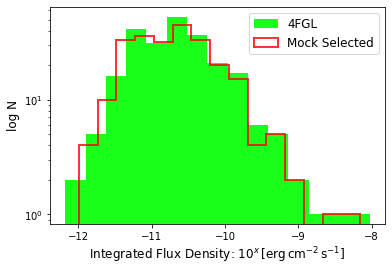

In [101]:
print ('selected  index plec: ', len(c_pl_i))

mock_source_num_plec = [i for i in range(len(c_pl_i))]

fig = plt.figure(figsize=(6, 4))

plt.hist(np.log10(v22PLEC_df_PSR['En_flux_100']), bins=PLEC_df_bins, density=False, 
         label='4FGL', color='lime', alpha=0.9)

plt.hist(np.log10(f_result_list_pl), bins=PLEC_df_bins, density=False, 
         histtype='stepfilled', fill=False, alpha=0.8, edgecolor='red', label='Mock Selected', 
        linewidth=2)


plt.yscale('log')
plt.xlabel(r'Integrated Flux Density: $10^{x}\, [\mathrm{erg}\, \mathrm{cm}^{-2}\, \mathrm{s}^{-1}]$', 
           fontsize=12)
plt.ylabel(r'log N', fontsize=12)

plt.legend(fontsize=12)

plt.savefig('Integrated_E100_mock_4FGL_PSRs.png', dpi=200)

print('number of selected sources (PSRs); ', len(f_result_list_pl))

len of Flux Density:  241
min and max GLAT and GLON:  -65.55953081656638 57.27261846540228
<class 'list'>


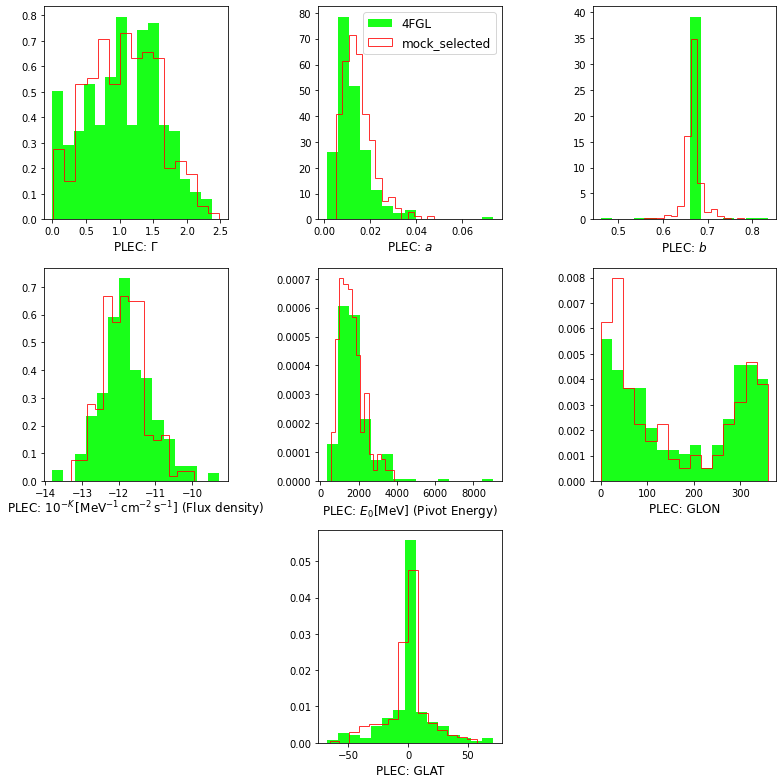

In [105]:
# print for sanity check @ length of all lists of parameters should be same
# compare the 4FGL original distributio and the selected parameters distribution 


fig = plt.figure(figsize=(11, 11))

fig.add_subplot(331)
plt.hist(v22PLEC_df_PSR['PLEC_Index'], bins=PLEC_df_bins, density=True, label='4FGL', color= 'lime', alpha=0.9)
plt.hist(c_pl_i, bins=PLEC_df_bins, density=True, label='mock selected', 
        histtype='stepfilled', fill=False, alpha=0.8, edgecolor='red')

plt.xlabel(r'PLEC: $\Gamma$', fontsize=12)



fig.add_subplot(332)
plt.hist(v22PLEC_df_PSR['PLEC_ExpFac'], bins=PLEC_df_bins, density=True, 
         label='4FGL', color= 'lime', alpha=0.9)

plt.hist(c_pl_Expa, bins=PLEC_df_bins, density=True, histtype='stepfilled', fill=False, alpha=0.8, 
         edgecolor='red', label='mock_selected')

plt.xlabel(r'PLEC: $a$', fontsize=12)
plt.legend(fontsize=12)
# plt.legend(fontsize=12)

fig.add_subplot(333)

plt.hist(v22PLEC_df_PSR['PLEC_ExpIndex'], bins=PLEC_df_bins, density=True, 
         label='4FGL', color= 'lime', alpha=0.9)
plt.hist(c_pl_Expb, bins=PLEC_df_bins, density=True, histtype='stepfilled', fill=False, alpha=0.8, 
         edgecolor='red')

plt.xlabel(r'PLEC: $b$', fontsize=12)


print ('len of Flux Density: ', len(c_pl_FD))
fig.add_subplot(334) # log of flux density is plotted 

plt.hist(np.log10(v22PLEC_df_PSR['PLEC_f_density']), bins=PLEC_df_bins, density=True, label='4FGL', 
         color= 'lime', alpha=0.9)
plt.hist(np.log10(c_pl_FD), bins=PLEC_df_bins, density=True, histtype='stepfilled', fill=False, 
         alpha=0.8, edgecolor='red')

plt.xlabel(r'PLEC: $10^{-K}\,  [\mathrm{MeV}^{-1}\, \mathrm{cm}^{-2}\, \mathrm{s}^{-1}]$ (Flux density)', 
           fontsize=12, labelpad=0.1)

fig.add_subplot(335)

plt.hist(v22PLEC_df_PSR['Piv_En'], bins=PLEC_df_bins, density=True, label='4FGL', color= 'lime', alpha=0.9)
plt.hist(c_pl_PEn, bins=PLEC_df_bins, density=True, histtype='stepfilled', fill=False, alpha=0.8, 
         edgecolor='red')

plt.xlabel(r'PLEC: $E_0 [\mathrm{MeV}]$ (Pivot Energy)', fontsize=12)


fig.add_subplot(336)
print ('min and max GLAT and GLON: ', min(c_GLAT_pl), max(c_GLAT_pl))

plt.hist(v22PLEC_df_PSR['GLON'], bins=PLEC_df_bins, density=True, label='4FGL', color= 'lime', alpha=0.9)
plt.hist(c_GLON_pl, bins=PLEC_df_bins, density=True, histtype='stepfilled', fill=False, alpha=0.8, 
         edgecolor='red')

plt.xlabel(r'PLEC: GLON', fontsize=12)

fig.add_subplot(338)

plt.hist(v22PLEC_df_PSR['GLAT'], bins=PLEC_df_bins, density=True, label='4FGL', color= 'lime', alpha=0.9)
plt.hist(c_GLAT_pl, bins=PLEC_df_bins, density=True, histtype='stepfilled', fill=False, alpha=0.8, 
         edgecolor='red')

plt.xlabel(r'PLEC: GLAT', fontsize=12)


plt.tight_layout()
plt.savefig('MockSelected_PSR_4FGL_Params.png', dpi=200)

print (type(c_GLAT_pl))

(array([0.02566174, 0.07698522, 0.07698522, 0.20529391, 0.35926434,
        0.28227912, 0.71852868, 0.69286694, 0.87249911, 0.76985216,
        0.48757303, 0.48757303, 0.51323477, 0.25661739, 0.17963217]),
 array([-2.50690296, -2.34037082, -2.17383867, -2.00730653, -1.84077439,
        -1.67424225, -1.50771011, -1.34117797, -1.17464583, -1.00811369,
        -0.84158155, -0.6750494 , -0.50851726, -0.34198512, -0.17545298,
        -0.00892084]),
 <a list of 1 Patch objects>)

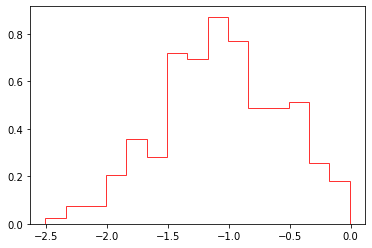

In [46]:
c_pl_i_rev = [i*(-1) for i in c_pl_i]
plt.hist(c_pl_i_rev, bins=PLEC_df_bins, density=True, label='mock selected', 
        histtype='stepfilled', fill=False, alpha=0.8, edgecolor='red')

In [38]:
mock_col_names = ['LP_Index', 'LP_beta' , 'LP_Flux_Density' , 'Pivot_Energy' , 'GLAT', 'GLON', 
                 'Energy_Flux100'] 

mock_AGN_df = pd.DataFrame(list(zip(c_lp_a, c_lp_b, c_lp_F, c_lp_PEn, c_GLAT, c_GLON, final_result_list)), 
                           columns=mock_col_names)

In [39]:
mock_AGN_df.head(3)

,LP_Index,LP_beta,LP_Flux_Density,Pivot_Energy,GLAT,GLON,Energy_Flux100
0,1.585045,0.166751,3.132193e-14,3116.439050,-31.001508,190.440210,2.453856e-12
1,2.567553,0.155115,4.383056e-13,1402.437648,-37.949879,180.769039,6.965411e-12
2,2.375164,0.252792,2.798503e-12,1321.054242,-19.123538,192.163332,2.861453e-11


#### Turn the Mock Catalog DataFrame to Fits

Use Astropy Table to turn the mock catalog dataframe to fits table. 

Then check by reading from the fits file following the first few cells of this notebook. 

In [39]:
#### Turning dataframe to fits format 

from astropy.table import Table

t = Table.from_pandas(mock_AGN_df)

print (t)

     LP_Index             LP_beta        ...     Energy_Flux100    
------------------ --------------------- ... ----------------------
2.3387860859879397  0.028356458407322038 ... 3.6352975706833873e-10
2.3478605360211566   0.12358351080441306 ...  3.803903207293152e-11
 1.914347873397082   0.06323933083423139 ... 2.3259765578135107e-12
 1.555127792025927   0.01570222627280276 ... 3.7328144439057516e-12
 2.639309882565917 -0.021557937635631658 ... 1.3216287229986872e-12
 2.059881436766287   0.11328240993729073 ... 2.7661983468125014e-12
2.1449772979658834   0.09744606684882207 ...  4.581158290758791e-10
 2.742564520672634  -0.03465599781353265 ...  7.447797903566141e-12
1.6869595603972463   0.21624233560850353 ... 1.9262482474642754e-12
2.3277112712927317    0.4730560796441699 ... 3.0320376480517735e-12
               ...                   ... ...                    ...
2.1849749731273875 -0.018468819796818595 ...  2.434768565206832e-12
2.0329293256957186   0.12498736856253452 ... 2.0

In [40]:
t.write('MockCat_AGNs_4FGL.fits', format='fits')

In [61]:
mock_agn_fits = fits.open('MockCat_AGNs_4FGL.fits')
mock_agn_fits.info()

Filename: MockCat_AGNs_4FGL.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     22   3145R x 7C   [D, D, D, D, D, D, D]   


In [64]:
mock_agn_fits_data = mock_agn_fits[1]
print (mock_agn_fits_data.data.shape)

(3145,)


In [42]:
mock_agn_fits_data_vals = gll_psc_v22_list1.data

# check the column names before 
mockLP_Index = mock_agn_fits_data_vals['LP_Index']
mockLP_Beta = gll_psc_v22_list1_data['LP_beta']
mockLP_GLON = gll_psc_v22_list1_data['GLON']

mockLP_GLAT = gll_psc_v22_list1_data['GLAT']
mockLP_PEn = gll_psc_v22_list1_data['Pivot_Energy']

mockLP_EnFlux100 = gll_psc_v22_list1_data['Energy_Flux100']

mockLP_FDensity = gll_psc_v22_list1_data['LP_Flux_Density']

In [43]:
mock4FGL_df = pd.DataFrame(data=mockLP_Index, columns=['MockLP_Index'])

In [44]:
mock4FGL_df['LP_beta'] = mockLP_Beta 

In [45]:
mock4FGL_df['MockEnergy_Flux100'] = mockLP_Beta

In [46]:
mock4FGL_df.head(3)

,MockLP_Index,LP_beta,MockEnergy_Flux100
0,1.993995,0.089688,0.089688
1,2.173274,0.024624,0.024624
2,2.112588,0.047278,0.047278


In [71]:
# #### select the bins 
# mockbin_file = open('mockbins.txt', 'w')
# for i in range(1, len(E100bins_notlast)):
#     E100bin_mockvals1 = 10**(E100bins_notlast[i-1])
#     E100bin_mockvals2 = 10**(E100bins_notlast[i])
#     mockbin_file.write(str(E100bin_mockvals1) + '\t' + str(E100bin_mockvals2) + '\n')

# mockbin_file.close()    

#### Convert DataFrame to xml File: 


In [60]:
# def func_dftoxml(row):
#     xml = ['<source>']
#     for field in row.index:
#         xml.append('  <field name="{0}">{1}</field>'.format(field, row[field]))
#     xml.append('</source>')
#     return '\n'.join(xml)

# print ('\n'.join(mock_AGN_df.apply(func_dftoxml, axis = 1)) )

In [2]:
## check the IEM file 
gll_iem = fits.open('gll_iem_v07.fits')
gll_iem.info()

Filename: gll_iem_v07.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      24   (2880, 1441, 28)   float32   
  1  ENERGIES      1 BinTableHDU     12   28R x 1C   [D]   


In [3]:
gll_iem_images = gll_iem[0]
gll_iem_images.data.shape

(28, 1441, 2880)

In [4]:
gll_iem_images.header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                 2880                                                  
NAXIS2  =                 1441                                                  
NAXIS3  =                   28                                                  
EXTEND  =                    T                                                  
CRVAL1  =                    0                                                  
CDELT1  =               -0.125                                                  
CRPIX1  =               1440.5                                                  
CTYPE1  = 'GLON-CAR'                                                            
CUNIT1  = 'deg     '                                                            
CRVAL2  =                   

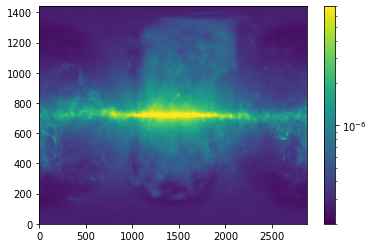

In [21]:
from  matplotlib.colors import LogNorm
plt.imshow(gll_iem_images.data[0, :, :], origin='lower', alpha=1, cmap='viridis', 
           norm=LogNorm(vmin=2e-7, vmax=7e-6), aspect='auto')
plt.colorbar()

In [40]:
refined_mock_col_names = ['norm', 'alpha', 'beta', 'Eb', 'RA', 'DEC'] 

refined_mock_AGN_df = pd.DataFrame(list(zip(c_lp_F, c_lp_a, c_lp_b, c_lp_PEn, c_GLON, c_GLAT)), 
                           columns=refined_mock_col_names)

In [47]:
refined_mock_AGN_df.head(3)
print ('max value of the norm const: ', refined_mock_AGN_df['norm'].max())
print ('min value of the norm const: ', refined_mock_AGN_df['norm'].min())

print ('max value of the alpha: ', refined_mock_AGN_df['alpha'].max())
print ('min value of the alpha: ', refined_mock_AGN_df['alpha'].min())

print ('max value of the Eb: ', refined_mock_AGN_df['Eb'].max())
print ('min value of the Eb: ', refined_mock_AGN_df['Eb'].min())

print ('max value of the beta: ', refined_mock_AGN_df['beta'].max())
print ('min value of the beta: ', refined_mock_AGN_df['beta'].min())

max value of the norm const:  9.228993328814695e-11
min value of the norm const:  8.496024072129211e-16
max value of the alpha:  3.3535002884675844
min value of the alpha:  0.7504859677896338
max value of the Eb:  20624.638234436778
min value of the Eb:  182.79570972717863
max value of the beta:  0.8198004674411287
min value of the beta:  -0.11972195348688501


In [59]:
# def func_dftoxml(row):
#     xml = ['<source name="LogParabola_source" type="PointSource">']
#     for field in row.index:
#         xml.append('  <field name="{0}">{1}</field>'.format(field, row[field]))
#     xml.append('</source>')
#     return '\n'.join(xml)

# print ('\n'.join(refined_mock_AGN_df.apply(func_dftoxml, axis = 1)) )

#### Create the Mock Catalog xml File (AGNs)

The description for Log Parabola Model xml file is given [here](https://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/xml_model_defs.html#xmlModelDefinitions).   

Also for later usage the original 4FGL catalog were selected using similar values. Both these xml files were used to generate and compare all skymap.   


In [106]:
### print check the max and min of selected params (AGNs)
c_lp_a, c_lp_b, c_lp_F, c_lp_PEn, c_GLAT, c_GLON

print ('max value of the norm const: ', max(c_lp_F))
print ('min value of the norm const: ', min(c_lp_F))

print ('max value of the alpha: ', max(c_lp_a))
print ('min value of the alpha: ', min(c_lp_a))

print ('max value of the Eb: ', max(c_lp_PEn))
print ('min value of the Eb: ', min(c_lp_PEn))

print ('max value of the beta: ', max(c_lp_b))
print ('min value of the beta: ', min(c_lp_b))

max value of the norm const:  9.599074621946915e-11
min value of the norm const:  1.193623123213414e-15
max value of the alpha:  3.521268126645219
min value of the alpha:  0.9740856001420477
max value of the Eb:  18154.271263688548
min value of the Eb:  150.39202860049258
max value of the beta:  0.6143748761459515
min value of the beta:  -0.1018004608097232


In [107]:
mock_xmlfile = open('mock_4FGL_1.xml', 'w')
mock_xmlfile.write('<source_library title="source library">\n')
for n, al, be, pivE, ra, dec, num in zip(c_lp_F, c_lp_a, c_lp_b, c_lp_PEn, c_GLON, c_GLAT, mock_source_num):
    
    mock_xmlfile.write('<source name="LogParabola_source{0}" type="PointSource">\n'.format(num))
    mock_xmlfile.write('<!-- point source units are cm^-2 s^-1 MeV^-1 -->\n')
    mock_xmlfile.write('<spectrum type="LogParabola">\n')
    mock_xmlfile.write(
        '<parameter free="1" max="1e-10" min="1e-16" name="norm" scale="1.0" value="{0}"/>\n'.format(n))
    mock_xmlfile.write('<parameter free="1" max="5" min="0" name="alpha" scale="1.0" value="{0}"/>\n'.format(al))
    mock_xmlfile.write('<parameter free="1" max="2e4" min="100" name="Eb" scale="1" value="{0}"/>\n'.format(pivE))
    mock_xmlfile.write(
        '<parameter free="1" max="0.80" min="-0.2" name="beta" scale="1.0" value="{0}"/>\n'.format(be))
    mock_xmlfile.write('</spectrum>\n')
    mock_xmlfile.write('<spatialModel type="SkyDirFunction">\n')
    mock_xmlfile.write(
        '<parameter free="0" max="360." min="0." name="RA" scale="1.0" value="{0}"/>\n'.format(ra))
    mock_xmlfile.write(
        '<parameter free="0" max="90." min="-90." name="DEC" scale="1.0" value="{0}"/>\n'.format(dec))
    mock_xmlfile.write('</spatialModel>\n')
    mock_xmlfile.write('</source>\n')
    
mock_xmlfile.write('</source_library>')    
mock_xmlfile.close()    

In [10]:
# #### convert the selected AGN (from real 4FGL catalog) dataframe columns to lists

# print ('column names of 4FGL AGN dataframe; ', v22LP_df_AGNs.columns)

In [12]:
# AGN_4FGL_Names = v22LP_df_AGNs['N'].to_list()
# AGN_4FGL_Alpha = v22LP_df_AGNs['LP_index'].to_list()
# AGN_4FGL_Beta  = v22LP_df_AGNs['LP_beta'].to_list()
# AGN_4FGL_PEn   = v22LP_df_AGNs['Piv_En'].to_list()
# AGN_4FGL_GLON  = v22LP_df_AGNs['GLON'].to_list()
# AGN_4FGL_GLAT  = v22LP_df_AGNs['GLAT'].to_list()
# AGN_4FGL_FDen  = v22LP_df_AGNs['LP_f_density'].to_list()

# AGN_4FGL_xmlfile = open('AGN_4FGL.xml', 'w')
# AGN_4FGL_xmlfile.write('<source_library title="source library">\n')

# for norm, alp, bet, piv, lon, lat, name in zip(AGN_4FGL_FDen, AGN_4FGL_Alpha, AGN_4FGL_Beta, AGN_4FGL_PEn, 
#                                               AGN_4FGL_GLON, AGN_4FGL_GLAT, AGN_4FGL_Names):
#     AGN_4FGL_xmlfile.write('<source name="{0}" type="PointSource">\n'.format(name))
#     AGN_4FGL_xmlfile.write('<!-- point source units are cm^-2 s^-1 MeV^-1 -->\n')
#     AGN_4FGL_xmlfile.write('<spectrum type="LogParabola">\n')
#     AGN_4FGL_xmlfile.write(
#         '<parameter free="1" max="8e-10" min="2.0e-16" name="norm" scale="1.0" value="{0}"/>\n'.format(norm))
#     AGN_4FGL_xmlfile.write(
#         '<parameter free="1" max="4" min="-0.35" name="alpha" scale="1.0" value="{0}"/>\n'.format(alp))
#     AGN_4FGL_xmlfile.write(
#         '<parameter free="1" max="2.6e5" min="100" name="Eb" scale="1.0" value="{0}"/>\n'.format(piv))
#     AGN_4FGL_xmlfile.write(
#         '<parameter free="1" max="1.0" min="-0.20" name="beta" scale="1.0" value="{0}"/>\n'.format(bet))
#     AGN_4FGL_xmlfile.write('</spectrum>\n')
#     AGN_4FGL_xmlfile.write('<spatialModel type="SkyDirFunction">\n')
#     AGN_4FGL_xmlfile.write(
#         '<parameter free="0" max="360" min="0" name="RA" scale="1.0" value="{0}"/>\n'.format(lon))
#     AGN_4FGL_xmlfile.write(
#         '<parameter free="0" max="90." min="-90." name="DEC" scale="1.0" value="{0}"/>\n'.format(lat))
#     AGN_4FGL_xmlfile.write('</spatialModel>\n')
#     AGN_4FGL_xmlfile.write('</source>\n')
# AGN_4FGL_xmlfile.write('</source_library>')
# AGN_4FGL_xmlfile.close()

In [142]:
# s = cauchy.rvs(cauchy_PLECb_loc, 0.005, size=PLEC_df_mock_cat_bins)
# s = s[(s>0.5) & (s<0.8)]
# # plt.hist(s, bins=int(np.sqrt(PLEC_df_mock_cat_bins)), density=True)
# plt.hist(s, bins=int(np.sqrt(PLEC_df_mock_cat_bins)), density=True, histtype='stepfilled', 
#          edgecolor='red', fill=False, alpha=0.8, label='Mock Cat.')
# plt.show()

In [116]:
#### multiple gaussian fit to pulsar spatial distribution 

#### Create the Mock Catalog xml File (PSRs)

In the docs: 
"For modeling pulsars. Note that the PLSuperExpCutoff spectral shape in the 4FGL corresponds to PLSuperExpCutoff2 in the Fermitools." 

The definition given in the documentation is different from the original paper. 

Definition in _docs_ :  $\frac{dN}{dE} = N_0 \, \left(\frac{E}{E_0}\right)^{\gamma _1}\, \text{exp}(-aE^{\gamma _2})$

Definition in _4FGL paper_ : $\frac{dN}{dE} = K\, \left(\frac{E}{E_0}\right)^{-\Gamma}\, \text{exp} \left( a\, \left(E_0^b - E^b \right) \right) $

Also for later usage the original 4FGL catalog were selected using similar values. Both these xml files were used to generate and compare all skymap.   

In [108]:
##### first check max and min values of each params; 

print ('max and min of PLEC index mock: ', max(c_pl_i), min(c_pl_i))
print ('max and min of PLEC Exp a mock: ', max(c_pl_Expa), min(c_pl_Expa))
print ('max and min of PLEC Exp b mock: ', max(c_pl_Expb), min(c_pl_Expb))
print ('max and min of PLEC Piv En mock: ', max(c_pl_PEn), min(c_pl_PEn))
print ('max and min of PLEC FD mock: ', max(c_pl_FD), min(c_pl_FD))

max and min of PLEC index mock:  2.481635366938625 0.015055276263237216
max and min of PLEC Exp a mock:  0.04780928737239484 0.005085645151135985
max and min of PLEC Exp b mock:  0.7816133665110063 0.5581729590344466
max and min of PLEC Piv En mock:  3829.5998488030705 548.0633097954903
max and min of PLEC FD mock:  1.1099853366134808e-10 4.9024680151035194e-14


In [109]:
mock_xmlfile_psr = open('mock_4FGL_psr1.xml', 'w')
mock_xmlfile_psr.write('<source_library title="source library">\n')
for fac, ga, Ea, Eb, PEn, ra, dec, num in zip(c_pl_FD, c_pl_i, c_pl_Expa, c_pl_Expb, c_pl_PEn,
                                         c_GLON_pl, c_GLAT_pl, mock_source_num_plec):
    
    mock_xmlfile_psr.write('<source name="PLSuperExpCutoff2_source{0}" type="PointSource">\n'.format(num))
    mock_xmlfile_psr.write('<!-- point source units are cm^-2 s^-1 MeV^-1 -->\n')
    mock_xmlfile_psr.write('<spectrum type="PLSuperExpCutoff2">\n')
    mock_xmlfile_psr.write(
        '<parameter free="1" max="2e-10" min="1e-15" name="Prefactor" scale="1.0" value="{0}"/>\n'.format(fac))
    mock_xmlfile_psr.write(
        '<parameter free="1" max="4" min="0." name="Index1" scale="1.0" value="{0}"/>\n'.format(ga))
    mock_xmlfile_psr.write(
        '<parameter free="0" max="6e4" min="100" name="Scale" scale="1" value="{0}"/>\n'.format(PEn))
    mock_xmlfile_psr.write(
        '<parameter free="1" max="0.08" min="0.0" name="Expfactor" scale="1.0" value="{0}"/>\n'.format(Ea))
    mock_xmlfile_psr.write(
        '<parameter free="0" max="0.90" min="0.45" name="Index2" scale="1.0" value="{0}"/>\n'.format(Eb))
    mock_xmlfile_psr.write('</spectrum>\n')
    mock_xmlfile_psr.write('<spatialModel type="SkyDirFunction">\n')
    mock_xmlfile_psr.write(
        '<parameter free="0" max="360." min="0." name="RA" scale="1.0" value="{0}"/>\n'.format(ra))
    mock_xmlfile_psr.write(
        '<parameter free="0" max="90." min="-90." name="DEC" scale="1.0" value="{0}"/>\n'.format(dec))
    mock_xmlfile_psr.write('</spatialModel>\n')
    mock_xmlfile_psr.write('</source>\n')
    
mock_xmlfile_psr.write('</source_library>')    
mock_xmlfile_psr.close()    

In [49]:

PSR_4FGL_Names = v22PLEC_df_PSR['N'].to_list()
PSR_4FGL_Gamma = v22PLEC_df_PSR['PLEC_Index'].to_list()
PSR_4FGL_Expa  = v22PLEC_df_PSR['PLEC_ExpFac'].to_list()
PSR_4FGL_Expb  = v22PLEC_df_PSR['PLEC_ExpIndex'].to_list()
PSR_4FGL_PEn   = v22PLEC_df_PSR['Piv_En'].to_list()
PSR_4FGL_GLON  = v22PLEC_df_PSR['GLON'].to_list()
PSR_4FGL_GLAT  = v22PLEC_df_PSR['GLAT'].to_list()
PSR_4FGL_FDen  = v22PLEC_df_PSR['PLEC_f_density'].to_list()




xmlfile_psr = open('PSR_4FGL.xml', 'w')
xmlfile_psr.write('<source_library title="source library">\n')
for fac, ga, Ea, Eb, PEn, ra, dec, num in zip(PSR_4FGL_FDen, PSR_4FGL_Gamma, PSR_4FGL_Expa, 
                                              PSR_4FGL_Expb, PSR_4FGL_PEn, 
                                              PSR_4FGL_GLON, PSR_4FGL_GLAT, PSR_4FGL_Names):
    
    xmlfile_psr.write('<source name="PLSuperExpCutoff2_source{0}" type="PointSource">\n'.format(num))
    xmlfile_psr.write('<!-- point source units are cm^-2 s^-1 MeV^-1 -->\n')
    xmlfile_psr.write('<spectrum type="PLSuperExpCutoff2">\n')
    xmlfile_psr.write(
        '<parameter free="1" max="6e-10" min="5e-15" name="Prefactor" scale="1.0" value="{0}"/>\n'.format(fac))
    xmlfile_psr.write(
        '<parameter free="1" max="4" min="0." name="Index1" scale="1.0" value="{0}"/>\n'.format(ga))
    xmlfile_psr.write(
        '<parameter free="0" max="1e5" min="100" name="Scale" scale="1" value="{0}"/>\n'.format(PEn))
    xmlfile_psr.write(
        '<parameter free="1" max="0.08" min="0.0" name="Expfactor" scale="1.0" value="{0}"/>\n'.format(Ea))
    xmlfile_psr.write(
        '<parameter free="0" max="0.90" min="0.40" name="Index2" scale="1.0" value="{0}"/>\n'.format(Eb))
    xmlfile_psr.write('</spectrum>\n')
    xmlfile_psr.write('<spatialModel type="SkyDirFunction">\n')
    xmlfile_psr.write(
        '<parameter free="0" max="360." min="0." name="RA" scale="1.0" value="{0}"/>\n'.format(ra))
    xmlfile_psr.write(
        '<parameter free="0" max="90." min="-90." name="DEC" scale="1.0" value="{0}"/>\n'.format(dec))
    xmlfile_psr.write('</spatialModel>\n')
    xmlfile_psr.write('</source>\n')
    
xmlfile_psr.write('</source_library>')    
xmlfile_psr.close()    